# Introduction to Data Science - Heart Disease Prediction problem

The aim of this student project is to analyze the dataset used in the article (listed below), replicate the obtained results and try to improve developed Machine Learning Model accuracy using some data science skills.
<br><b>Article</b>: Implementation of Machine Learning Model to Predict Heart Failure Disease
<br><b>Author</b>: Fahd Saleh Alotaibi
<br><b>Dataset</b>: Heart Disease Cleveland UCI ([www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci?datasetId=576697&sortBy=relevance))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
X = pd.read_csv('heart_cleveland_upload.csv')

In [4]:
print(f'Shape of the dataset')
print(f'Number of Features: {X.shape[1]}')
print(f'Number of Observations: {X.shape[0]}')

Shape of the dataset
Number of Features: 14
Number of Observations: 297


In [5]:
X.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype=object)

### Attributes description

| <center>Feature | <center>Description | <center>Domain | <center>Data type | <center>Mean | <center>Standard deviation|
| --- | --- | --- | --- | --- | --- |
| <center>Age | <center>The age of the person (in years) | <center>29-77 | <center>Ratio | <center>54.542 | <center>9.05 |
| <center>Sex | <center>The gender of a person | <center>0: female<br> 1: male<center> | <center>Nominal | <center>- | <center>- |
| <center>Cp | <center>The level of chest pain a patient suffering from, when reached to the hospital | <center>0: typical angina (caused by physical activity or stress)<br> 1: atypical angina (the chest pain occurs suddenly)<br> 2: non-anginal pain (not caused by heart disease)<br> 3: asymptomatic (silent myocardial infraction - SMI)<center> | <center>Nominal | <center>- | <center>- |
| <center>Trestbps | <center>Resting blood pressure in mmHg | <center>94-200 | <center>Ratio | <center>131.694 | <center>17.763 |
| <center>Chol | <center>The cholesteral level recorded in mg/dl | <center>126-564 | <center>Ratio | <center>247.35 | <center>51.998 |
| <center>Fbs | <center>Fasting blood sugar >120 mg/dl (indicates diabetes)| <center>0: false<br> 1: true<center> | <center>Nominal | <center>- | <center>- |
| <center>Restecg | <center>Resting electrocardiographic results | <center>0: normal<br> 1: having ST-T wave abnormality <br>(predictor of cardiovascular mortality)<br> 2: showing probable or definite left ventricular hypertrophy<center> | <center>Nominal | <center>- | <center>- |
| <center>Thalach | <center>The maximum value of heartbeat counted at the time of admission (bpm) | <center>71-202 | <center>Ratio | <center>149.599 | <center>22.942 |
| <center>Exang | <center>Does exercies induce angina or not | <center>0: no<br> 1: yes<center> | <center>Nominal | <center>- | <center>- |
| <center>Oldpeak | <center>ST depression induced by exercise relative to rest | <center>0-6.2 | <center>Ratio | <center>1.056 | <center>1.166 |
| <center>Slope | <center>Slope of the peak exercise ST segment | <center>0: upsloping<br>1: flat<br>2: downsloping<br> (horizontal and downsloping ST depression indicates disease) | <center>Ordinal | <center>- | <center>- |
| <center>Ca | <center>Number of major vessels colored by fluoroscopy (not colored blood vessel means there is a blood clot in it) | <center>0-3| <center>Ratio | <center>0.677 | <center>0.939 |
| <center>Thal | <center> The results of Thallium test | <center>0: normal<br> 1: fixed defect (a perfusion defect present at stress and rest, for example scarred myocardium from prior infarct)<br> 2: reversible defect (stress-induced ischemia)<center> | <center>Nominal | <center>- | <center>- |
| <center>Condition | <center>Disease condition | <center>0: no chances of heart failure<br> 1: strong chances of heart failure<center> | <center>Nominal | <center>- | <center>- |


### Research Question
With the attributes described above, could one predict if a patient has heart disease?

In [6]:
X.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol_level', 'fasting_blood_sugar',
             'rest_ecg', 'max_heartbeat', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 
            'thal_test', 'condition']

In [7]:
X.head(6)

age  sex  chest_pain_type  resting_blood_pressure  cholesterol_level  \
0   69    1                0                     160                234   
1   69    0                0                     140                239   
2   66    0                0                     150                226   
3   65    1                0                     138                282   
4   64    1                0                     110                211   
5   64    1                0                     170                227   

   fasting_blood_sugar  rest_ecg  max_heartbeat  exercise_induced_angina  \
0                    1         2            131                        0   
1                    0         0            151                        0   
2                    0         0            114                        0   
3                    1         2            174                        0   
4                    0         2            144                        1   
5                    0         2            155                        0   

   st_depression  st_slope  num_major_vessels  thal_test  condition  
0            0.1         1                  1          0          0  
1            1.8         0                  2          0          0  
2            2.6         2                  0          0          0  
3            1.4         1                  1          0          1  
4            1.8         1                  0          0          0  
5            0.6         1                  0          2          0

In [8]:
X.tail(6)

age  sex  chest_pain_type  resting_blood_pressure  cholesterol_level  \
291   40    1                3                     110                167   
292   40    1                3                     152                223   
293   39    1                3                     118                219   
294   35    1                3                     120                198   
295   35    0                3                     138                183   
296   35    1                3                     126                282   

     fasting_blood_sugar  rest_ecg  max_heartbeat  exercise_induced_angina  \
291                    0         2            114                        1   
292                    0         0            181                        0   
293                    0         0            140                        0   
294                    0         0            130                        1   
295                    0         0            182                        0   
296                    0         2            156                        1   

     st_depression  st_slope  num_major_vessels  thal_test  condition  
291            2.0         1                  0          2          1  
292            0.0         0                  0          2          1  
293            1.2         1                  0          2          1  
294            1.6         1                  0          2          1  
295            1.4         0                  0          0          0  
296            0.0         0                  0          2          1

In [9]:
X.describe().transpose()

count        mean        std    min    25%    50%  \
age                      297.0   54.542088   9.049736   29.0   48.0   56.0   
sex                      297.0    0.676768   0.468500    0.0    0.0    1.0   
chest_pain_type          297.0    2.158249   0.964859    0.0    2.0    2.0   
resting_blood_pressure   297.0  131.693603  17.762806   94.0  120.0  130.0   
cholesterol_level        297.0  247.350168  51.997583  126.0  211.0  243.0   
fasting_blood_sugar      297.0    0.144781   0.352474    0.0    0.0    0.0   
rest_ecg                 297.0    0.996633   0.994914    0.0    0.0    1.0   
max_heartbeat            297.0  149.599327  22.941562   71.0  133.0  153.0   
exercise_induced_angina  297.0    0.326599   0.469761    0.0    0.0    0.0   
st_depression            297.0    1.055556   1.166123    0.0    0.0    0.8   
st_slope                 297.0    0.602694   0.618187    0.0    0.0    1.0   
num_major_vessels        297.0    0.676768   0.938965    0.0    0.0    0.0   
thal_test                297.0    0.835017   0.956690    0.0    0.0    0.0   
condition                297.0    0.461279   0.499340    0.0    0.0    0.0   

                           75%    max  
age                       61.0   77.0  
sex                        1.0    1.0  
chest_pain_type            3.0    3.0  
resting_blood_pressure   140.0  200.0  
cholesterol_level        276.0  564.0  
fasting_blood_sugar        0.0    1.0  
rest_ecg                   2.0    2.0  
max_heartbeat            166.0  202.0  
exercise_induced_angina    1.0    1.0  
st_depression              1.6    6.2  
st_slope                   1.0    2.0  
num_major_vessels          1.0    3.0  
thal_test                  2.0    2.0  
condition                  1.0    1.0

cholesterol_level and st_depression have max values slightly larger than their mean values, so we will check if those values are potential outliars.

In [10]:
print("Cholesterol level > 276: ", (X.cholesterol_level > 276).sum())
print("Cholesterol level > 300: ", (X.cholesterol_level > 300).sum())
print("Cholesterol level > 400: ", (X.cholesterol_level > 400).sum())
print("Cholesterol level > 500: ", (X.cholesterol_level > 500).sum())

Cholesterol level > 276:  74
Cholesterol level > 300:  44
Cholesterol level > 400:  4
Cholesterol level > 500:  1


In [11]:
X.loc[X.cholesterol_level > 400, 'cholesterol_level']

79     564
83     417
180    407
238    409
Name: cholesterol_level, dtype: int64

In [12]:
print('Mean value of cholesterol level: ',X.cholesterol_level.mean())
print('Standard deviation cholesterol level: ',X.cholesterol_level.std())
print('Maximum value of cholesterol level is',(X.cholesterol_level.max()-X.cholesterol_level.mean())/X.cholesterol_level.std(), 
      'standard deviations distant from mean value of cholesterol level.\nAlso, it is', (X.cholesterol_level.max()-417)/X.cholesterol_level.std(),
       'standard deviations distant from its next closest value.')

Mean value of cholesterol level:  247.35016835016836
Standard deviation cholesterol level:  51.99758253513897
Maximum value of cholesterol level is 6.08970294793697 standard deviations distant from mean value of cholesterol level.
Also, it is 2.827054505864003 standard deviations distant from its next closest value.


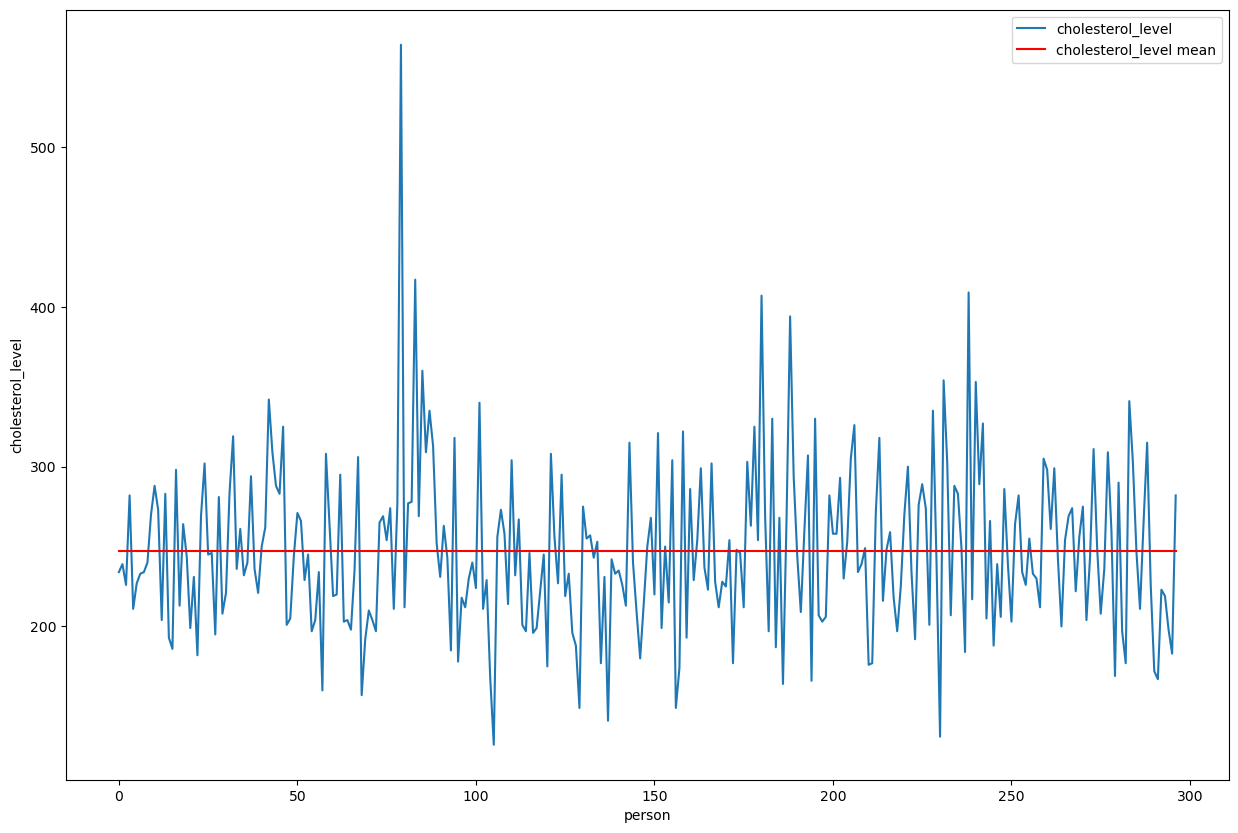

Mean value of cholesterol level: 247.35016835016836 
a median: 243.0 
Minimum value of cholesterol level: 126 
a maximum value of cholesterol level: 564


In [13]:
mean = []
for i in range (0, len(X.index)):
    mean.append(X.loc[:,'cholesterol_level'].mean())


fig,ax1=plt.subplots()
fig.set_size_inches(15,10)

ax1.plot(X.loc[:,'cholesterol_level'], label = 'cholesterol_level')

ax1.plot(mean, c='r', label = 'cholesterol_level mean')
ax1.set_xlabel('person')
ax1.set_ylabel('cholesterol_level')
plt.legend()

plt.show()

print('Mean value of cholesterol level:', X.loc[:,'cholesterol_level'].mean(),
      '\na median:',  X.loc[:,'cholesterol_level'].median(),
      '\nMinimum value of cholesterol level:', X.loc[:,'cholesterol_level'].min(),
      '\na maximum value of cholesterol level:', X.loc[:,'cholesterol_level'].max())

In [14]:
print("st_depression > 1.6 :", (X.st_depression > 1.6).sum())
print("st_depression > 3 :", (X.st_depression > 3).sum())
print("st_depression > 4 :", (X.st_depression > 4).sum())
print("st_depression > 5 :", (X.st_depression > 5).sum())
print("st_depression > 6 :", (X.st_depression > 6).sum())

st_depression > 1.6 : 74
st_depression > 3 : 20
st_depression > 4 : 5
st_depression > 5 : 2
st_depression > 6 : 1


In [15]:
X.loc[X.st_depression > 4, 'st_depression']

9      4.2
186    6.2
213    4.4
239    5.6
260    4.2
Name: st_depression, dtype: float64

In [16]:
X.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      50
cholesterol_level          152
fasting_blood_sugar          2
rest_ecg                     3
max_heartbeat               91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            4
thal_test                    3
condition                    2
dtype: int64

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      297 non-null    int64  
 1   sex                      297 non-null    int64  
 2   chest_pain_type          297 non-null    int64  
 3   resting_blood_pressure   297 non-null    int64  
 4   cholesterol_level        297 non-null    int64  
 5   fasting_blood_sugar      297 non-null    int64  
 6   rest_ecg                 297 non-null    int64  
 7   max_heartbeat            297 non-null    int64  
 8   exercise_induced_angina  297 non-null    int64  
 9   st_depression            297 non-null    float64
 10  st_slope                 297 non-null    int64  
 11  num_major_vessels        297 non-null    int64  
 12  thal_test                297 non-null    int64  
 13  condition                297 non-null    int64  
dtypes: float64(1), int64(13)
m

In [18]:
X.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol_level          0
fasting_blood_sugar        0
rest_ecg                   0
max_heartbeat              0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thal_test                  0
condition                  0
dtype: int64

As we can see above, this dataset does not have any null or missing value. This time we can skip the data cleaning procedure.
<br> Now we can explore distribution of two elemental variables <i>Age</i> and <i>Sex</i> in relation to target variable <i>Condition</i>.

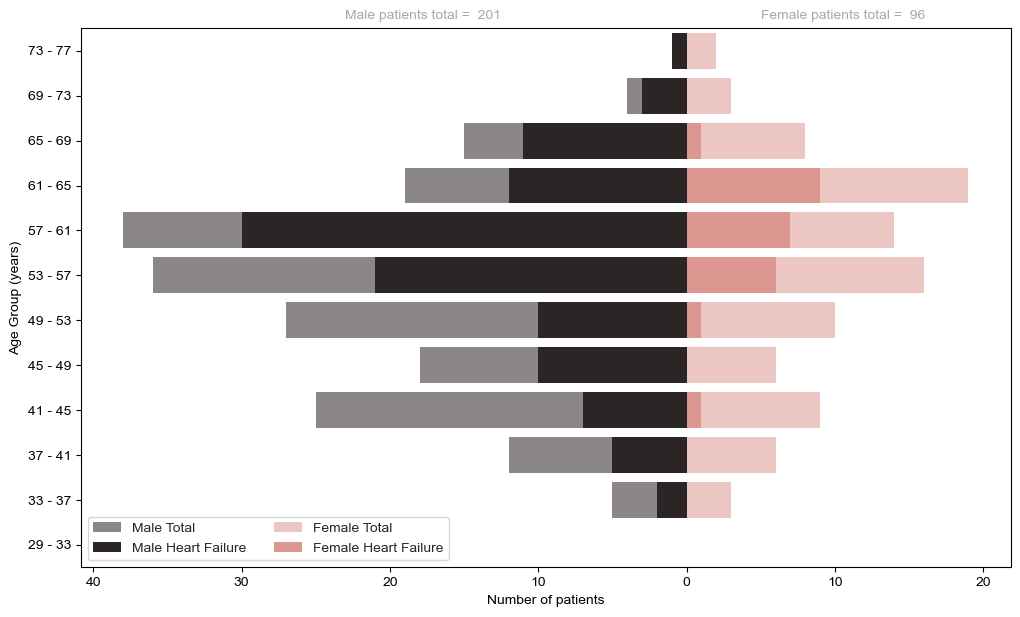

In [19]:
X_tmp = X.copy()

# min age: 29, max age:77
X_tmp['age_group'] = pd.cut(X['age'], bins = [29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77])
ag = X_tmp.sort_values('age_group').groupby('age_group').count().age.index.values
age_group_name = [str(s).replace('(','').replace(', ',' - ').replace(']','') for s in ag]

df = pd.DataFrame()
df['age_group_name'] = age_group_name

age_group_count_f = X_tmp.loc[X_tmp.sex==0,:].sort_values('age_group').groupby('age_group').count().age.values
df['age_group_count_f'] = age_group_count_f

age_group_count_f_d = X_tmp.loc[(X_tmp.sex==0) & (X_tmp.condition == 1),:].sort_values('age_group').groupby('age_group').count().age.values
df['age_group_count_f_d'] = age_group_count_f_d

age_group_count_m = X_tmp.loc[X_tmp.sex==1,:].sort_values('age_group').groupby('age_group').count().age.values * -1
df['age_group_count_m'] = age_group_count_m

age_group_count_m_d = X_tmp.loc[(X_tmp.sex==1) & (X_tmp.condition == 1),:].sort_values('age_group').groupby('age_group').count().age.values * -1
df['age_group_count_m_d'] = age_group_count_m_d

f, ax = plt.subplots(figsize = (12,7))
sns.set_style('whitegrid')

bar_plot = sns.barplot(x = 'age_group_count_m', y = 'age_group_name', data = df.iloc[::-1], orient = 'h', color=(0.176, 0.141, 0.141), lw=0, alpha = 0.55, label = 'Male Total')
bar_plot = sns.barplot(x = 'age_group_count_m_d', y = 'age_group_name', data = df.iloc[::-1], orient = 'h', color=(0.176, 0.141, 0.141), lw=0, label = 'Male Heart Failure')

bar_plot = sns.barplot(x = 'age_group_count_f', y = 'age_group_name', data = df.iloc[::-1], orient = 'h', color=(0.914, 0.557, 0.514), lw=0, alpha = 0.55, label = 'Female Total')
bar_plot = sns.barplot(x = 'age_group_count_f_d', y = 'age_group_name', data = df.iloc[::-1], orient = 'h', color=(0.914, 0.557, 0.514), lw=0, label = 'Female Heart Failure')

labels = ['50','40', '30', '20', '10', '0', '10', '20']
bar_plot.set_xticklabels(labels)
bar_plot.set(xlabel= 'Number of patients', ylabel = 'Age Group (years)')

plt.text(-23,-0.7,'Male patients total =  201', alpha = 0.4)
plt.text(5,-0.7,'Female patients total =  96', alpha = 0.4)

ax.legend(ncol = 2, loc = 'lower left')
plt.show()

We can make the following observations here:
- The number of male patients is two times of female patients.
- There is no visual outliers detected.
- Majority of study participants lie between 50 to 60 years of age.
- Older patients are more likely to have heart disease.
- Males are much more likely for heart diseases.

To get more familiar with the data and to examine it systematically, the first step is Exploratory Data Analysis (EDA). EDA is used to discover relationships among variables for both numerical and categorical variables and to gain an insight on the correlations, trends and patterns using graphics and visualizations. EDA can be classified as Univariate, Bivariate and Multivariate analysis. Each of these categories have further divisions based on the role (outcome or explanatory) and type (categorical or continuous) of the variables being examined.
<br>These three analyzes will be carried out in the following sections.


### UNIVARIATE ANALYSIS
Univariate analysis is concerned with the description of individual variables in a given data set. It is always a good idea to perform univariate EDA on each of the components of data set.

In [20]:
X_tmp = X.copy()

X_tmp['sex'] = X_tmp['sex'].map({0:'female',1:'male'})

X_tmp['chest_pain_type'] = X_tmp['chest_pain_type'].map({3:'asymptomatic', 2:'non_anginal_pain', 1:'atypical_angina', 0:'typical_angina'})

X_tmp['fasting_blood_sugar'] = X_tmp['fasting_blood_sugar'].map({0:'less_than_120mg/ml',1:'greater_than_120mg/ml'})

X_tmp['rest_ecg'] = X_tmp['rest_ecg'].map({0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'})

X_tmp['exercise_induced_angina'] = X_tmp['exercise_induced_angina'].map({0:'no',1:'yes'})

X_tmp['st_slope'] = X_tmp['st_slope'].map({0:'upsloping',1:'flat',2:'downsloping'})

X_tmp['thal_test'] = X_tmp['thal_test'].map({1:'fixed_defect',0:'normal',2:'reversable_defect'})

X_tmp['condition'] = X_tmp['condition'].map({0:'no_disease', 1:'has_disease'})

### Categorical Data

In [21]:
categorical = [i for i in X_tmp.loc[:,X_tmp.nunique()<=10]]
print('List of categorical variables:')
categorical

List of categorical variables:


['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'st_slope',
 'num_major_vessels',
 'thal_test',
 'condition']

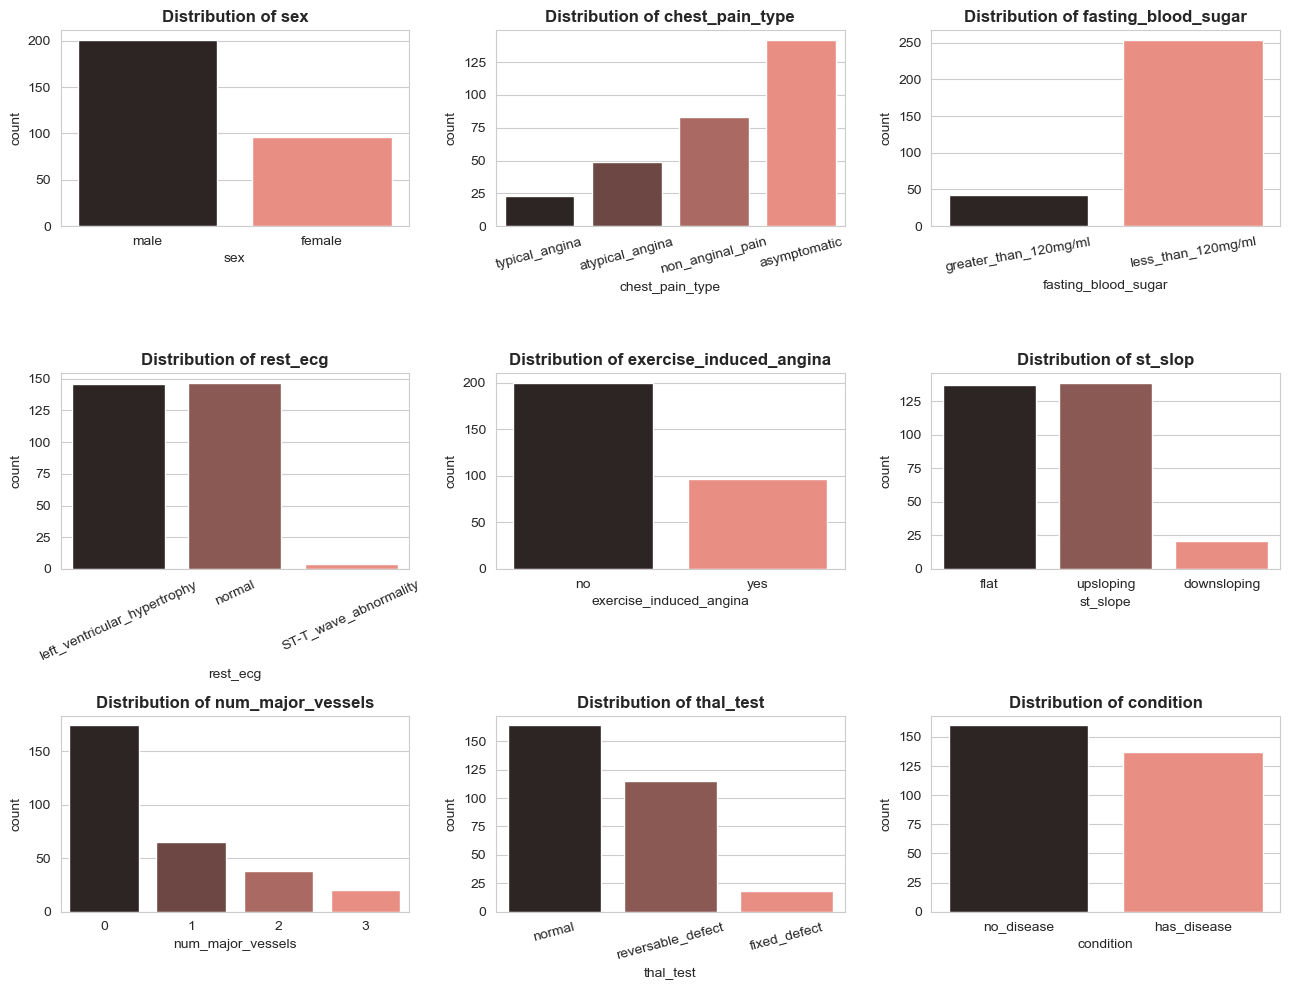

In [22]:
fig, axes = plt.subplots(3, 3, figsize = (13,10))

rot = [0, 15, 10, 25, 0, 0, 0, 15, 0]
titles = ['Distribution of sex', 'Distribution of chest_pain_type', 'Distribution of fasting_blood_sugar', 'Distribution of rest_ecg',
         'Distribution of exercise_induced_angina', 'Distribution of st_slop', 'Distribution of num_major_vessels', 
          'Distribution of thal_test', 'Distribution of condition']

for i, ax in enumerate(axes.flatten()):
    bar_plot = sns.countplot(ax = ax, data = X_tmp, x = categorical[i], palette="dark:salmon")
    bar_plot.set_xticklabels(bar_plot.get_xticklabels(),rotation=rot[i])   
    ax.set_title(titles[i], fontweight = 'bold')

fig.tight_layout()
plt.show()

We can make the following observations here:
 - Nearly 50 % of patients have asymptomatic chest pain, i.e. they do not realize their condition.
 - 85 % of patients have blood sugar level under 120 mg/dl.
 - Abnormal ST-T segment in electrocardiograph is present in only 1 % of patients, but the half of the subjects has probable or definite left ventricular hypertrophy.
 - More than half of <i>st_slope</i> values show abnormalities (flat and downsloping). 
 - There is roughly equal distribution of people with heart disease and people without it.


### Continuous Data

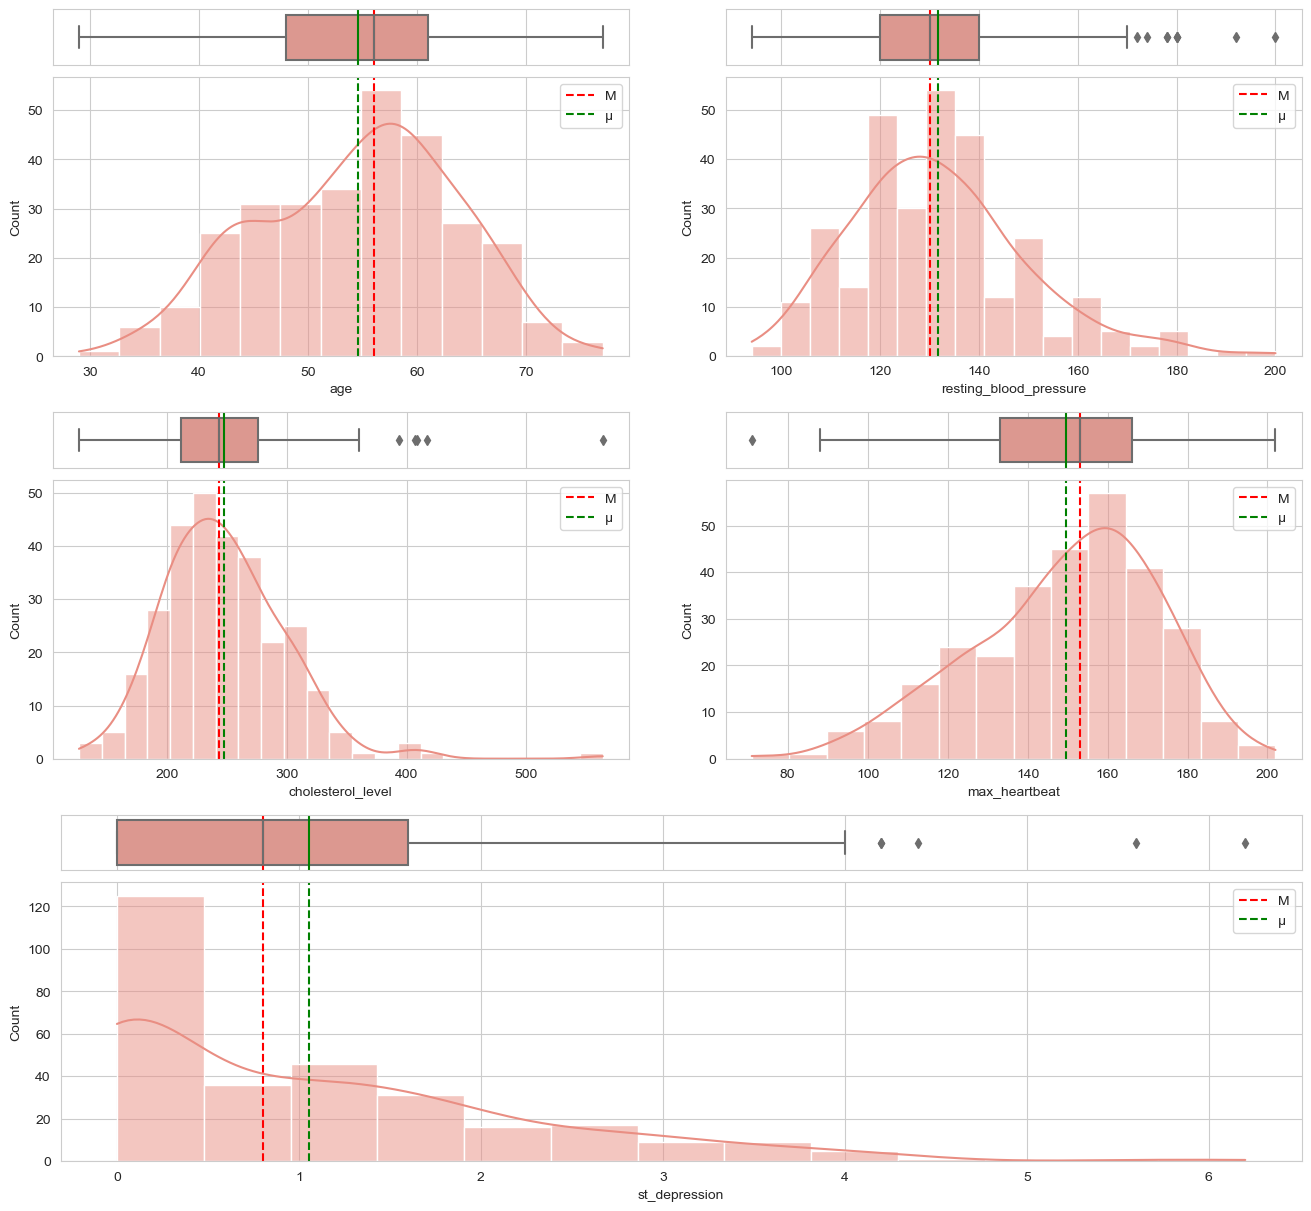

In [23]:
fig = plt.figure(layout="constrained", figsize=(13, 12))
subfigs = fig.subfigures(3, 1, wspace=0.07)

continuous = [i for i in X.loc[:,X.nunique()>10]]

def grid_element(subfigs_s, i, j):
    axs = subfigs_s[j].subplots(2, sharex = True, gridspec_kw= {"height_ratios": (0.2, 1)})
    
    sns.boxplot(ax = axs[0], data = X, x = continuous[i], color= (0.914, 0.557, 0.514)).set(xlabel = None)
    axs[0].axvline(X.loc[:, continuous[i]].median(), color = 'r', linestyle = '-')
    axs[0].axvline(X.loc[:, continuous[i]].mean(), color = 'g', linestyle = '-')

    sns.histplot(data = X, x = continuous[i], ax = axs[1], kde=True, color = (0.914, 0.557, 0.514))
    
    axs[1].axvline(X.loc[:, continuous[i]].median(), color = 'r', linestyle = '--', label = 'M')
    axs[1].axvline(X.loc[:, continuous[i]].mean(), color = 'g', linestyle = '--', label = '\u03BC')
    
    axs[1].legend()
    
for i, subfig in enumerate(subfigs.flatten()):
        
    if (i==2):
        subfigs_s = subfig.subfigures(1, 1, wspace=0.07)
        subfigs_s = [subfigs_s]
        grid_element(subfigs_s, i * 2, 0)
        break
        
    subfigs_s = subfig.subfigures(1, 2, wspace=0.07)
    grid_element(subfigs_s, i * 2, 0)
    grid_element(subfigs_s, i * 2 + 1, 1)


We can make the following observations here:
 - Most of resting blood pressure is distributed around 130 mmHg (hypertension) and maximum heartbeat around 150 bpm (tachycardia).
 - The majority of continuous variables follow close approximation to Gaussian distribution with left or right skew, except variable <i>st_depression</i>.
 - Some outliers can be noticed, especially a strong one in <i>cholesteral_level</i>. We will pay more attention to them later in the project. 

### BIVARIATE ANALYSIS
Bivariate data involves two different variables where we are concerned about investigating the causes and relationship between those two variables.



### Categorical Data

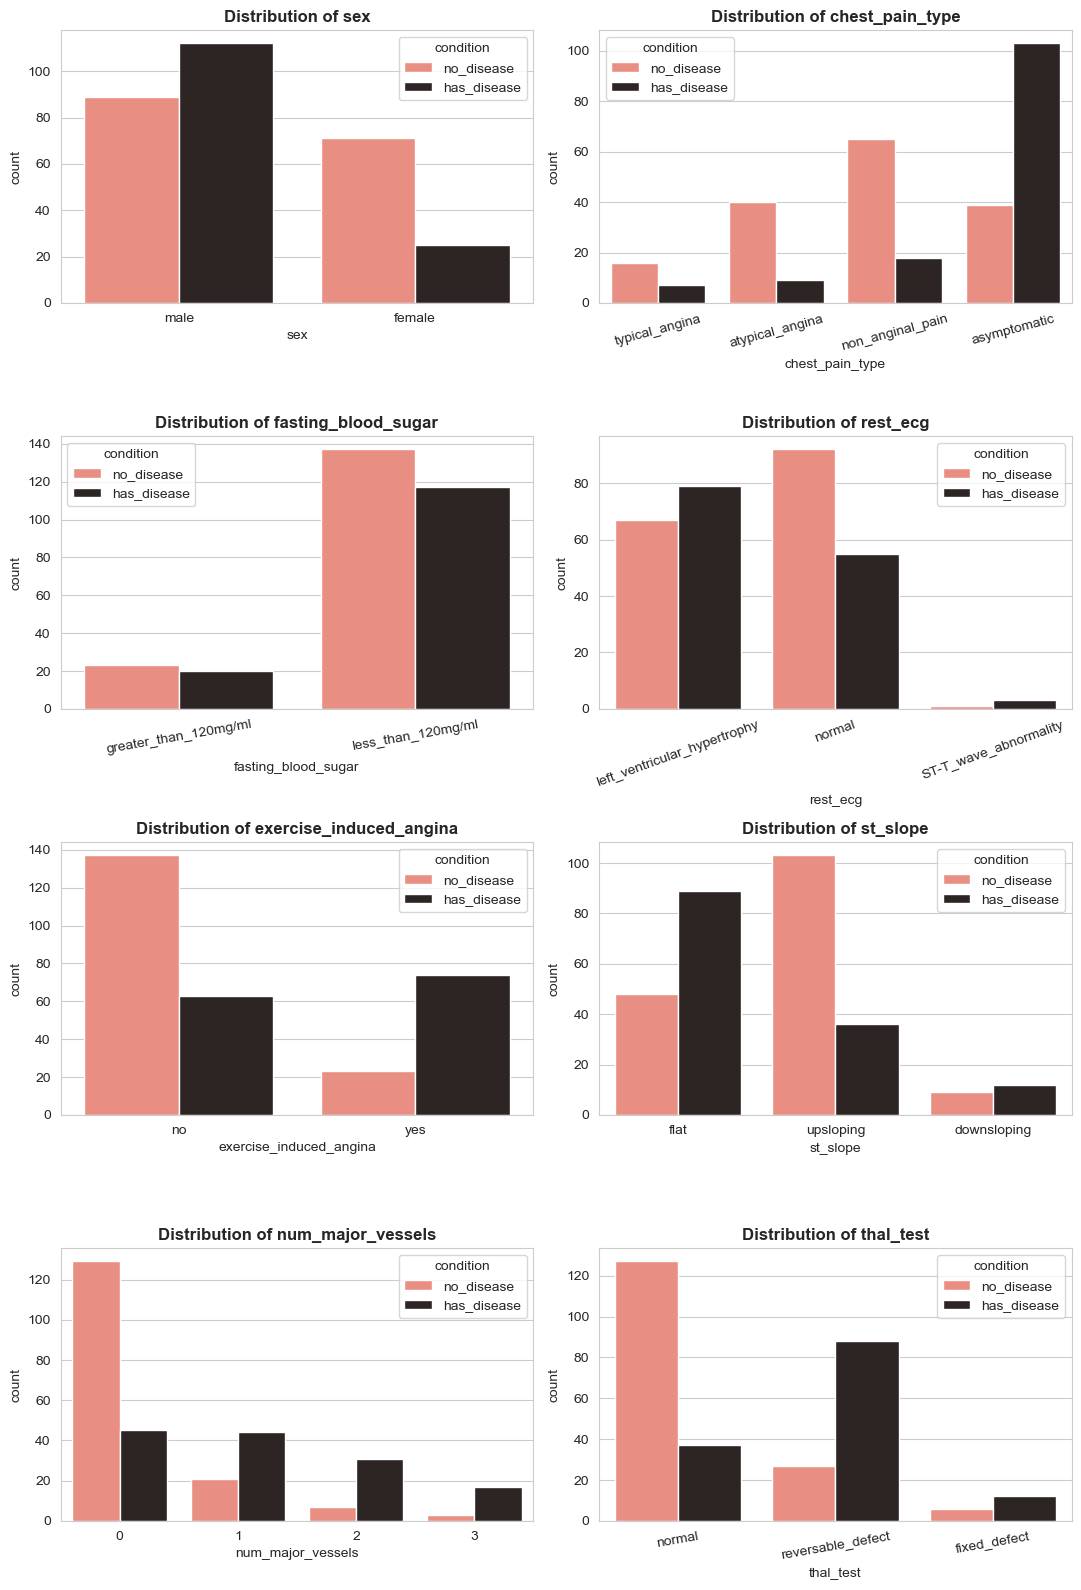

In [24]:
fig, axes = plt.subplots(4, 2, figsize = (11,16))

rot = [0, 15, 10, 20, 0, 0, 0, 10]
titles = ['Distribution of sex', 'Distribution of chest_pain_type', 'Distribution of fasting_blood_sugar', 'Distribution of rest_ecg',
         'Distribution of exercise_induced_angina', 'Distribution of st_slope', 'Distribution of num_major_vessels', 'Distribution of thal_test']

try:
    categorical.remove('condition')
except ValueError:
    pass

for i, ax in enumerate(axes.flatten()):
    
    bar_plot = sns.countplot(ax = ax, hue = 'condition', data = X_tmp, x = categorical[i], palette='dark:salmon_r')
    bar_plot.set_xticklabels(bar_plot.get_xticklabels(),rotation=rot[i])
    
    ax.set_title(titles[i], fontweight = 'bold')

fig.tight_layout()    
plt.show()

We can make the following observations here:
 - Male patients appear to be at a higher risk of heart failure than female patients.
 - Asymptomatic chest pains have the highest disease outcome.
 - A fasting blood sugar level has no direct effect on disease.
 - Patients with exercise induced angina are almost 3 times more likely to have heart disease.
 - Having upsloping ST depression and 0 colored major vessels are good predictors of heart disease absence.
 - The number of major vessels colored in fluoroscopy appears to be at similar levels for all patients having the heart disease.
 - Having defected thalium test results is relatively strong indicator for heart disease.

### Continuous Data

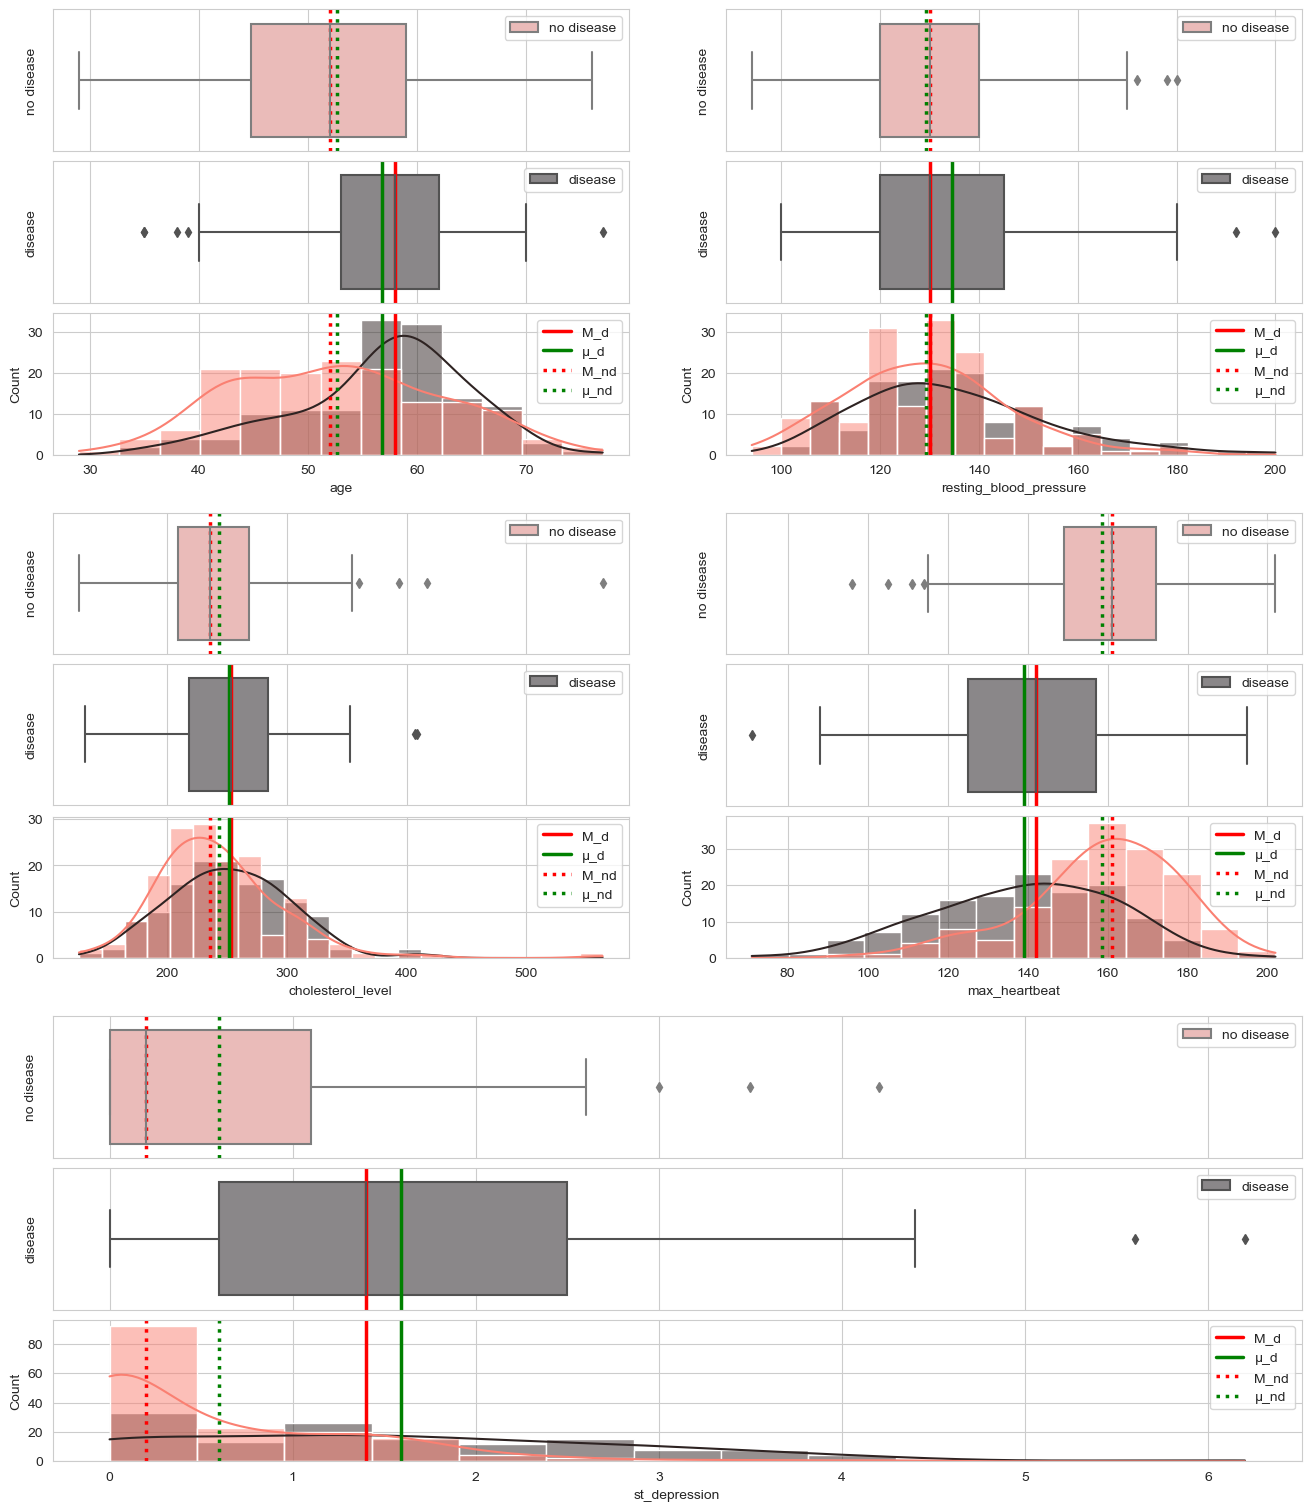

In [25]:
fig = plt.figure(layout="constrained", figsize=(13, 15))
subfigs = fig.subfigures(3, 1, wspace=0.07)

continuous = [i for i in X.loc[:,X.nunique()>5]]

def grid_element(subfigs_s, i, j):
    
    axs = subfigs_s[j].subplots(3, sharex = True)

    sns.boxplot(data = X.loc[X.loc[:,'condition'] == 0, :], x = continuous[i], ax = axs[0], color = (0.949, 0.706, 0.694)).set(xlabel = None, ylabel = 'no disease')
    axs[0].axvline(X.loc[X.loc[:,'condition'] == 0, continuous[i]].median(), color = 'r', linestyle = ':', linewidth=2.5)
    axs[0].axvline(X.loc[X.loc[:,'condition'] == 0, continuous[i]].mean(), color = 'g', linestyle = ':', linewidth=2.5)
    axs[0].legend(['no disease'])
    
    sns.boxplot(data = X.loc[X.loc[:,'condition'] == 1, :], x = continuous[i], ax = axs[1], color = (0.545, 0.525, 0.537)).set(xlabel = None, ylabel = 'disease')
    axs[1].axvline(X.loc[X.loc[:,'condition'] == 1, continuous[i]].median(), color = 'r', linestyle = '-', linewidth=2.5)
    axs[1].axvline(X.loc[X.loc[:,'condition'] == 1, continuous[i]].mean(), color = 'g', linestyle = '-', linewidth=2.5)
    axs[1].legend(['disease'])
    
    if (i==4):
        sns.histplot(data = X_tmp, x = continuous[i], hue = 'condition', ax = axs[2], kde=True, palette='dark:salmon_r')
    else:
        sns.histplot(data = X_tmp, x = continuous[i], hue = 'condition', ax = axs[2], kde=True, palette='dark:salmon_r')
        
            
    axs[2].axvline(X.loc[X.loc[:,'condition'] == 1, continuous[i]].median(), color = 'r', linestyle = '-', label = 'M_d', linewidth=2.5)
    axs[2].axvline(X.loc[X.loc[:,'condition'] == 1, continuous[i]].mean(), color = 'g', linestyle = '-', label = '\u03BC_d', linewidth=2.5)
    
    axs[2].axvline(X.loc[X.loc[:,'condition'] == 0, continuous[i]].median(), color = 'r', linestyle = ':', label = 'M_nd', linewidth=2.5)
    axs[2].axvline(X.loc[X.loc[:,'condition'] == 0, continuous[i]].mean(), color = 'g', linestyle = ':', label = '\u03BC_nd', linewidth=2.5)
     
    legend1 = plt.legend()
    axs[2].legend()

for i, subfig in enumerate(subfigs.flatten()):
    
    if (i==2):
        subfigs_s = subfig.subfigures(1, 1, wspace=0.07)
        subfigs_s = [subfigs_s]
        grid_element(subfigs_s, i * 2, 0)
        break
         
    subfigs_s = subfig.subfigures(1, 2, wspace=0.07)
    grid_element(subfigs_s, i * 2, 0)
    grid_element(subfigs_s, i * 2 + 1, 1)

We can make the following observations here:
 - Patients with high resting blood pressure and high cholesterol level have a slightly higher chances of developing heart disease.
 - Patient (outlier) with an extremly high cholesterol level is counterintuitively associated with <i>no disease</i>.
 - Maximum heart rate achieved by an individual can be a good predictor of having heart disease (upper quartile of <i>disease</i> boxplot is lower than <i>no_disease</i> median).
 - ST depression level is positively correlated with presence of heart disease.

### MULTIVARIATE ANALYSIS
When problems involve three or more variables they are inherently multidimensional and require the use of Multivariate Data Analysis. Types of Multivariate Analysis include Cluster Analysis, Factor Analysis, Multiple Regression Analysis, Principal Component Analysis, etc. 

In [26]:
import plotly.express as px

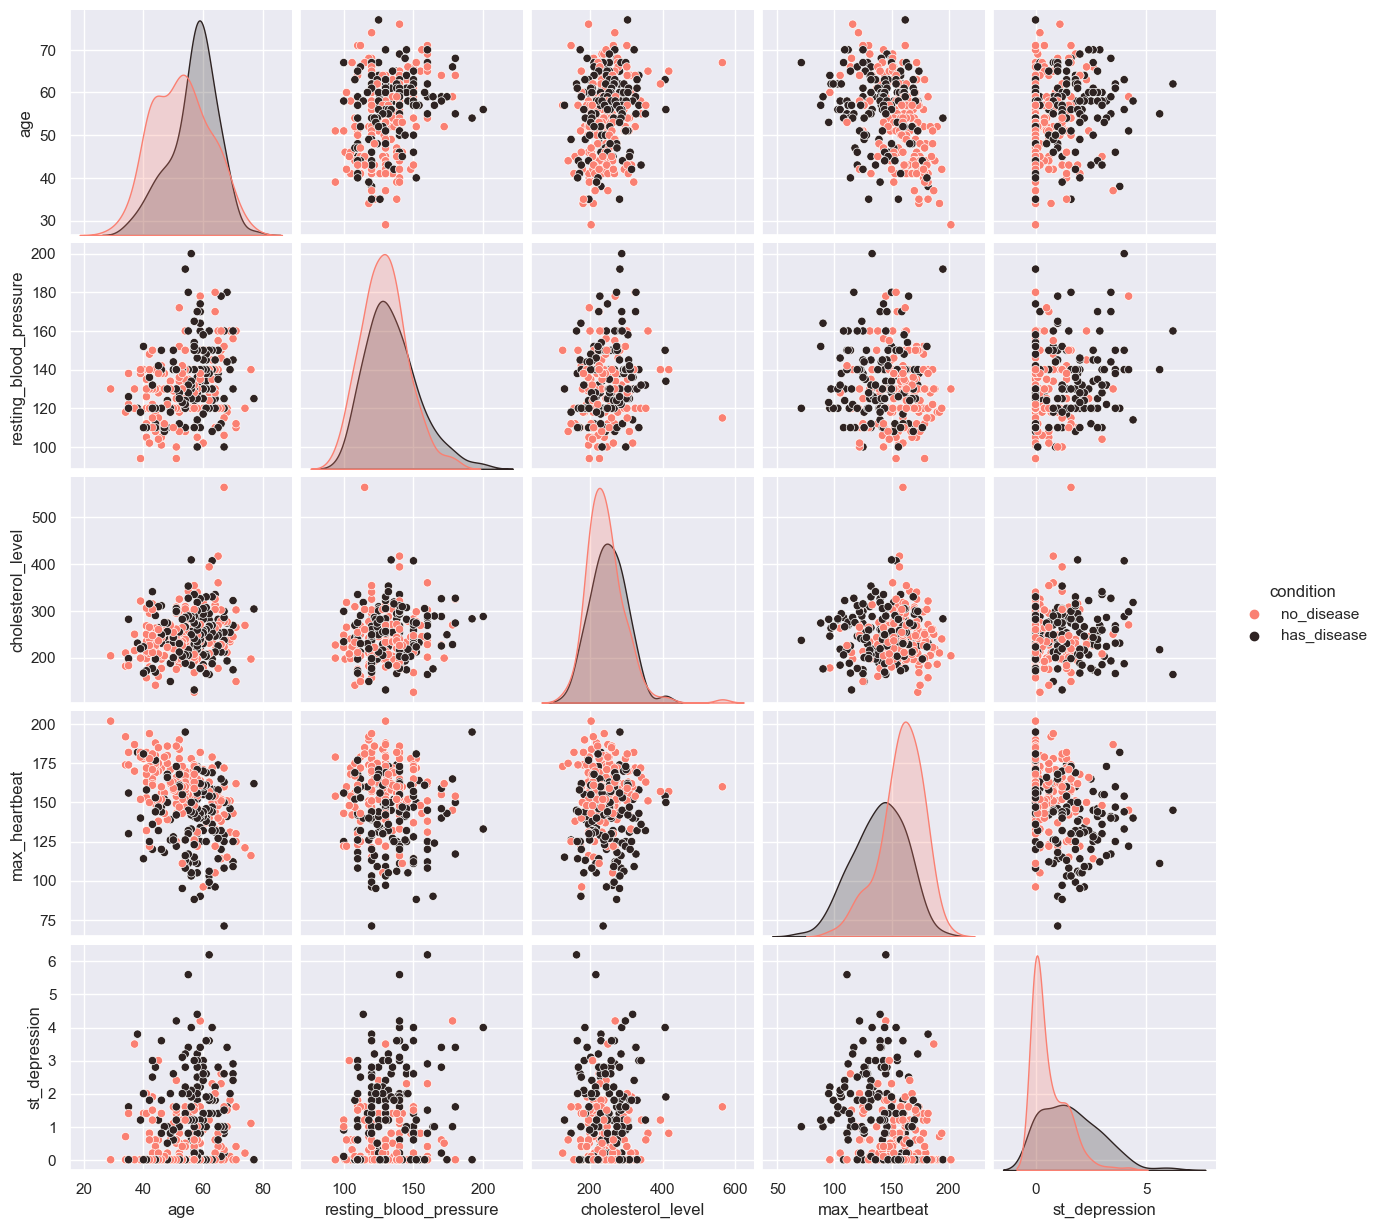

In [27]:
sns.set(rc = {'figure.figsize':(25,15)})
continuous.append('condition')
sns.pairplot(data = X_tmp.loc[:,continuous], hue = 'condition',  palette='dark:salmon_r')
continuous.pop()
plt.show()

There is no clear visual separation in any of the scatterplots shown above, but some of them provide good intuition which variables could be of use in further modelling. For example, any combination of <i>max_heartbeat</i>, <i>age</i> and <i>st_depression</i>  might have the potential to classify patients with and without heart disease. Therefore, those three variables will be used to create 3d scatterplot, whereby the size of markers represents variable <i>chest_pain_type</i>.

In [28]:
color_discrete_map={'0': "rgb(255,255,180)", '1': "rgb(1,2,3)"}
fig = px.scatter_3d(X, x='age', y='max_heartbeat', z='st_depression',color='condition', opacity = 1, size_max = 20, size='chest_pain_type', color_continuous_scale = px.colors.sequential.Jet)

fig.show()

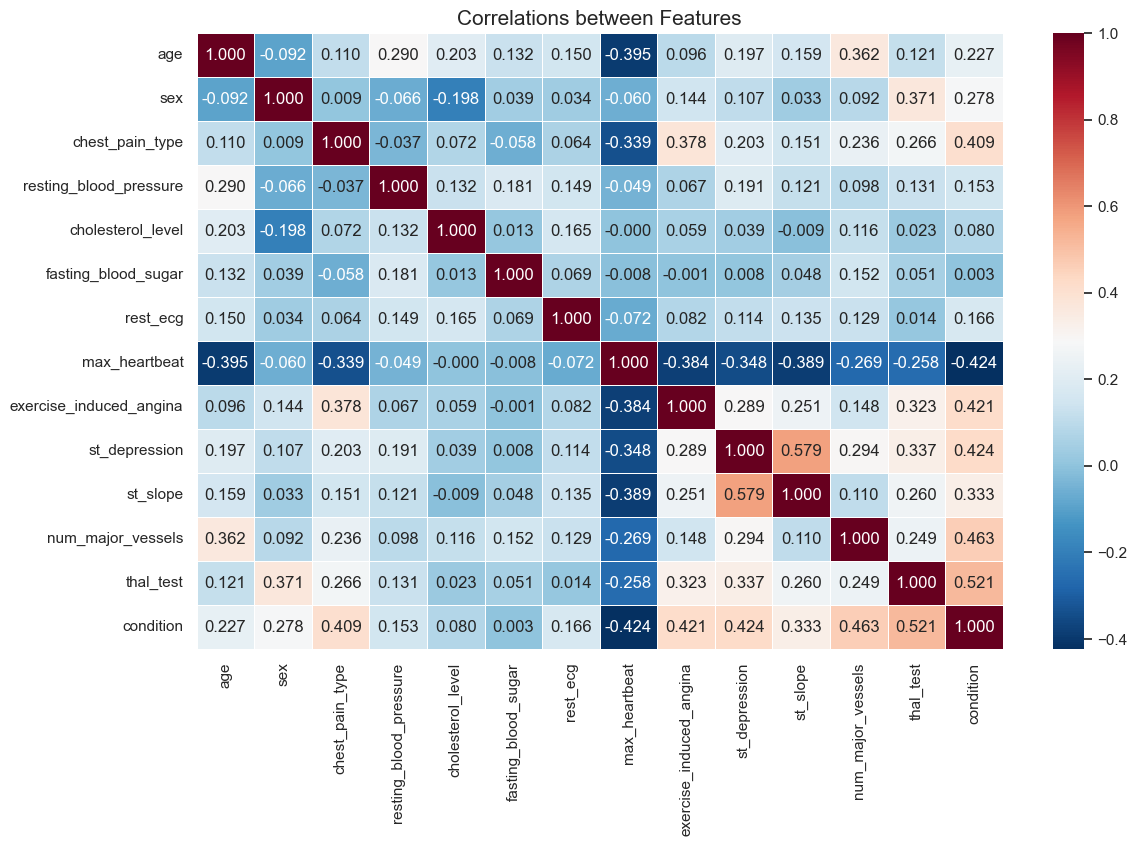

In [29]:
sns.set(rc={'figure.figsize':(13,8)})
sns.heatmap(X.corr(), annot=True, fmt=".3f", cmap="RdBu_r", linewidths=.5)
plt.title('Correlations between Features', fontsize=15)

plt.show()

 - The most correlated features with target variable <i>condition</i> are:
    - <i>thal_test<i>
    - <i>num_major_vessels</i>
    - <i>st_depression</i>
    - <i>exercise_induced_angina</i>
    - <i>max_heartbeat</i>

 - There is no highly correlated attributes (the highest correlation coefficient is 0.579 for variables <i>st_depression</i> and <i>st_slope</i>) so it can be concluded that there is no attribute redundancy in  data.


## BUILDING THE MODEL

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import tree
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

import random

In [31]:
seed = 43
np.random.seed(43)

In [32]:
X_c = pd.read_csv('heart.csv')

In [33]:
X_c.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol_level', 'fasting_blood_sugar',
             'rest_ecg', 'max_heartbeat', 'exercise_induced_angina', 'st_depression', 'st_slope', 'condition']

In [34]:
X_c['sex'] = X_c['sex'].replace(['F'], 0)
X_c['sex'] = X_c['sex'].replace(['M'], 1)

X_c['chest_pain_type'] = X_c['chest_pain_type'].replace(['TA'], 0)
X_c['chest_pain_type'] = X_c['chest_pain_type'].replace(['ATA'], 1)
X_c['chest_pain_type'] = X_c['chest_pain_type'].replace(['NAP'], 2)
X_c['chest_pain_type'] = X_c['chest_pain_type'].replace(['ASY'], 3)

X_c['rest_ecg'] = X_c['rest_ecg'].replace(['Normal'], 0)
X_c['rest_ecg'] = X_c['rest_ecg'].replace(['ST'], 1)
X_c['rest_ecg'] = X_c['rest_ecg'].replace(['LVH'], 2)

X_c['exercise_induced_angina'] = X_c['exercise_induced_angina'].replace(['Y'], 1)
X_c['exercise_induced_angina'] = X_c['exercise_induced_angina'].replace(['N'], 0)

X_c['st_slope'] = X_c['st_slope'].replace(['Up'], 0)
X_c['st_slope'] = X_c['st_slope'].replace(['Flat'], 1)
X_c['st_slope'] = X_c['st_slope'].replace(['Down'], 2)

In [35]:
X_c.describe().transpose()

count        mean         std   min     25%    50%  \
age                      918.0   53.510893    9.432617  28.0   47.00   54.0   
sex                      918.0    0.789760    0.407701   0.0    1.00    1.0   
chest_pain_type          918.0    2.251634    0.931031   0.0    2.00    3.0   
resting_blood_pressure   918.0  132.396514   18.514154   0.0  120.00  130.0   
cholesterol_level        918.0  198.799564  109.384145   0.0  173.25  223.0   
fasting_blood_sugar      918.0    0.233115    0.423046   0.0    0.00    0.0   
rest_ecg                 918.0    0.603486    0.805968   0.0    0.00    0.0   
max_heartbeat            918.0  136.809368   25.460334  60.0  120.00  138.0   
exercise_induced_angina  918.0    0.404139    0.490992   0.0    0.00    0.0   
st_depression            918.0    0.887364    1.066570  -2.6    0.00    0.6   
st_slope                 918.0    0.638344    0.607056   0.0    0.00    1.0   
condition                918.0    0.553377    0.497414   0.0    0.00    1.0   

                           75%    max  
age                       60.0   77.0  
sex                        1.0    1.0  
chest_pain_type            3.0    3.0  
resting_blood_pressure   140.0  200.0  
cholesterol_level        267.0  603.0  
fasting_blood_sugar        0.0    1.0  
rest_ecg                   1.0    2.0  
max_heartbeat            156.0  202.0  
exercise_induced_angina    1.0    1.0  
st_depression              1.5    6.2  
st_slope                   1.0    2.0  
condition                  1.0    1.0

In [36]:
X_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      918 non-null    int64  
 1   sex                      918 non-null    int64  
 2   chest_pain_type          918 non-null    int64  
 3   resting_blood_pressure   918 non-null    int64  
 4   cholesterol_level        918 non-null    int64  
 5   fasting_blood_sugar      918 non-null    int64  
 6   rest_ecg                 918 non-null    int64  
 7   max_heartbeat            918 non-null    int64  
 8   exercise_induced_angina  918 non-null    int64  
 9   st_depression            918 non-null    float64
 10  st_slope                 918 non-null    int64  
 11  condition                918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


Remove data that already exists in 'heart_cleveland_upload.csv'

In [37]:
X_n = X.copy()
X_n.pop('num_major_vessels')
X_n.pop('thal_test')
for i in range(len(X_n)):
    j = 0
    while((X_n.iloc[i] == X_c.iloc[j]).sum() != 12):
        j+=1
    X_c = X_c.T
    X_c.pop(j)
    X_c = X_c.T
    X_c.reset_index(drop = True, inplace = True)

In [38]:
X_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      621 non-null    float64
 1   sex                      621 non-null    float64
 2   chest_pain_type          621 non-null    float64
 3   resting_blood_pressure   621 non-null    float64
 4   cholesterol_level        621 non-null    float64
 5   fasting_blood_sugar      621 non-null    float64
 6   rest_ecg                 621 non-null    float64
 7   max_heartbeat            621 non-null    float64
 8   exercise_induced_angina  621 non-null    float64
 9   st_depression            621 non-null    float64
 10  st_slope                 621 non-null    float64
 11  condition                621 non-null    float64
dtypes: float64(12)
memory usage: 58.3 KB


In [39]:
for column_name in X_c.columns.values:
    if(column_name != 'st_depression'):
        X_c[column_name] = X_c[column_name].astype(int)

In [40]:
X_c.describe().transpose()

count        mean         std   min    25%    50%  \
age                      621.0   53.017713    9.578269  28.0   47.0   54.0   
sex                      621.0    0.843800    0.363337   0.0    1.0    1.0   
chest_pain_type          621.0    2.296296    0.911823   0.0    2.0    3.0   
resting_blood_pressure   621.0  132.732689   18.867690   0.0  120.0  130.0   
cholesterol_level        621.0  175.579710  121.393783   0.0    0.0  213.0   
fasting_blood_sugar      621.0    0.275362    0.447057   0.0    0.0    0.0   
rest_ecg                 621.0    0.415459    0.615409   0.0    0.0    0.0   
max_heartbeat            621.0  130.692432   24.323633  60.0  115.0  130.0   
exercise_induced_angina  621.0    0.441224    0.496934   0.0    0.0    0.0   
st_depression            621.0    0.806924    1.006607  -2.6    0.0    0.3   
st_slope                 621.0    0.655395    0.601416   0.0    0.0    1.0   
condition                621.0    0.597424    0.490812   0.0    0.0    1.0   

                           75%    max  
age                       60.0   77.0  
sex                        1.0    1.0  
chest_pain_type            3.0    3.0  
resting_blood_pressure   140.0  200.0  
cholesterol_level        260.0  603.0  
fasting_blood_sugar        1.0    1.0  
rest_ecg                   1.0    2.0  
max_heartbeat            149.0  190.0  
exercise_induced_angina    1.0    1.0  
st_depression              1.5    5.0  
st_slope                   1.0    2.0  
condition                  1.0    1.0

In [41]:
X_c.loc[X_c['st_depression']<0,'st_depression'] = 0

In [42]:
X_tmp = X_c.copy()

X_tmp['sex'] = X_tmp['sex'].map({0:'female',1:'male'})

X_tmp['chest_pain_type'] = X_tmp['chest_pain_type'].map({3:'asymptomatic', 2:'non_anginal_pain', 1:'atypical_angina', 0:'typical_angina'})

X_tmp['fasting_blood_sugar'] = X_tmp['fasting_blood_sugar'].map({0:'less_than_120mg/ml',1:'greater_than_120mg/ml'})

X_tmp['rest_ecg'] = X_tmp['rest_ecg'].map({0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'})

X_tmp['exercise_induced_angina'] = X_tmp['exercise_induced_angina'].map({0:'no',1:'yes'})

X_tmp['st_slope'] = X_tmp['st_slope'].map({0:'upsloping',1:'flat',2:'downsloping'})

X_tmp['condition'] = X_tmp['condition'].map({0:'no_disease', 1:'has_disease'})

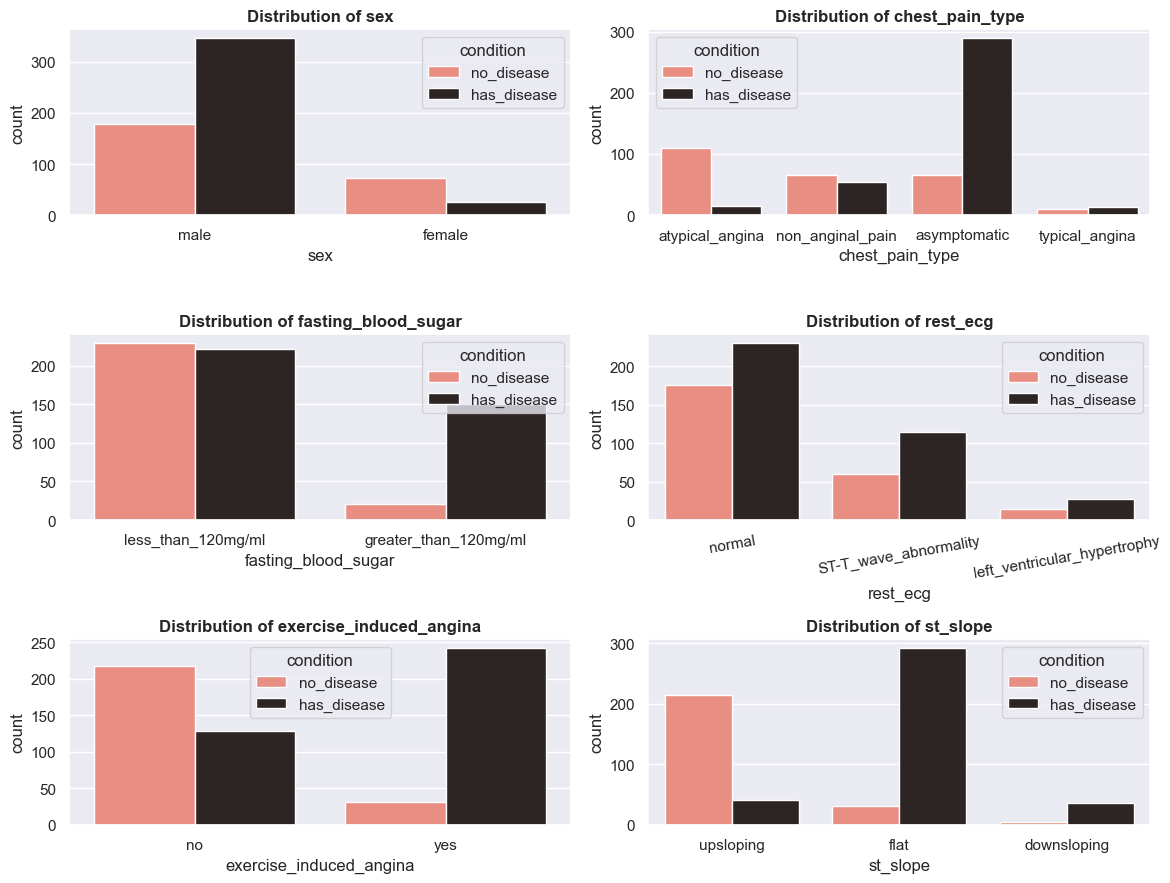

In [43]:
fig, axes = plt.subplots(3, 2, figsize = (12,9))

rot = [0, 0, 0, 0, 0, 0]
titles = ['Distribution of sex', 'Distribution of chest_pain_type', 'Distribution of fasting_blood_sugar', 'Distribution of rest_ecg',
         'Distribution of exercise_induced_angina', 'Distribution of st_slope']

categorical = [i for i in X_c.loc[:,X_c.nunique()<=10]]
try:
    categorical.remove('condition')
except ValueError:
    pass

rot = [0, 0, 0, 10, 0, 0, 0]

for i, ax in enumerate(axes.flatten()):
    bar_plot = sns.countplot(ax = ax, hue = 'condition', data = X_tmp, x = categorical[i], palette='dark:salmon_r')
    bar_plot.set_xticklabels(bar_plot.get_xticklabels(),rotation=rot[i])
    
    ax.set_title(titles[i], fontweight = 'bold')
    
fig.tight_layout()
plt.show()

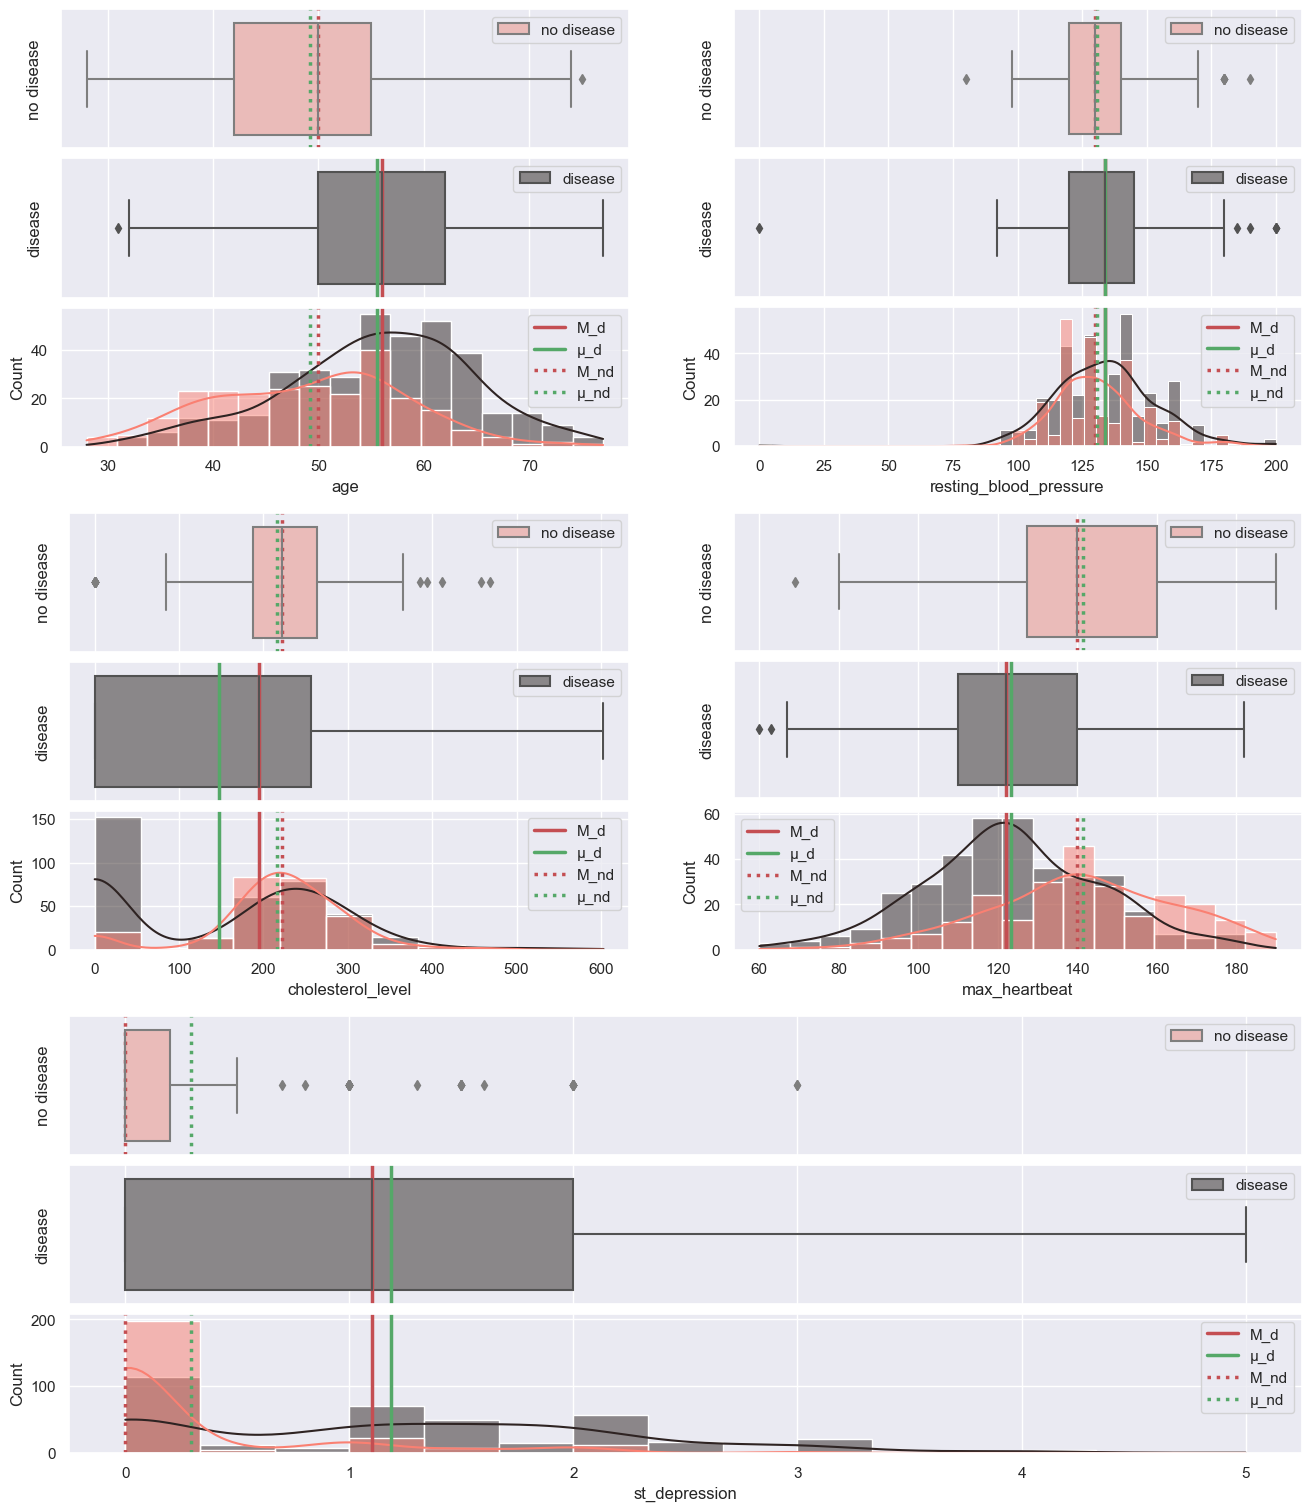

In [44]:
fig = plt.figure(layout="constrained", figsize=(13, 15))
subfigs = fig.subfigures(3, 1, wspace=0.07)

continuous = [i for i in X_c.loc[:,X_c.nunique()>5]]

def grid_element(subfigs_s, i, j):
    
    axs = subfigs_s[j].subplots(3, sharex = True)

    sns.boxplot(data = X_c.loc[X_c.loc[:,'condition'] == 0, :], x = continuous[i], ax = axs[0], color = (0.949, 0.706, 0.694)).set(xlabel = None, ylabel = 'no disease')
    axs[0].axvline(X_c.loc[X_c.loc[:,'condition'] == 0, continuous[i]].median(), color = 'r', linestyle = ':', linewidth=2.5)
    axs[0].axvline(X_c.loc[X_c.loc[:,'condition'] == 0, continuous[i]].mean(), color = 'g', linestyle = ':', linewidth=2.5)
    axs[0].legend(['no disease'])
    
    sns.boxplot(data = X_c.loc[X_c.loc[:,'condition'] == 1, :], x = continuous[i], ax = axs[1], color = (0.545, 0.525, 0.537)).set(xlabel = None, ylabel = 'disease')
    axs[1].axvline(X_c.loc[X_c.loc[:,'condition'] == 1, continuous[i]].median(), color = 'r', linestyle = '-', linewidth=2.5)
    axs[1].axvline(X_c.loc[X_c.loc[:,'condition'] == 1, continuous[i]].mean(), color = 'g', linestyle = '-', linewidth=2.5)
    axs[1].legend(['disease'])
    
    if (i==4):
        sns.histplot(data = X_tmp, x = continuous[i], hue = 'condition', ax = axs[2], kde=True, palette='dark:salmon_r')
    else:
        sns.histplot(data = X_tmp, x = continuous[i], hue = 'condition', ax = axs[2], kde=True, palette='dark:salmon_r')
        
            
    axs[2].axvline(X_c.loc[X_c.loc[:,'condition'] == 1, continuous[i]].median(), color = 'r', linestyle = '-', label = 'M_d', linewidth=2.5)
    axs[2].axvline(X_c.loc[X_c.loc[:,'condition'] == 1, continuous[i]].mean(), color = 'g', linestyle = '-', label = '\u03BC_d', linewidth=2.5)
    
    axs[2].axvline(X_c.loc[X_c.loc[:,'condition'] == 0, continuous[i]].median(), color = 'r', linestyle = ':', label = 'M_nd', linewidth=2.5)
    axs[2].axvline(X_c.loc[X_c.loc[:,'condition'] == 0, continuous[i]].mean(), color = 'g', linestyle = ':', label = '\u03BC_nd', linewidth=2.5)
     
    legend1 = plt.legend()
    axs[2].legend()

for i, subfig in enumerate(subfigs.flatten()):
    
    if (i==2):
        subfigs_s = subfig.subfigures(1, 1, wspace=0.07)
        subfigs_s = [subfigs_s]
        grid_element(subfigs_s, i * 2, 0)
        break
         
    subfigs_s = subfig.subfigures(1, 2, wspace=0.07)
    grid_element(subfigs_s, i * 2, 0)
    grid_element(subfigs_s, i * 2 + 1, 1)

In [45]:
data2 = X_c.copy()

In [46]:
y = X['condition']
X.drop('condition', axis = 1, inplace = True)

y_c = X_c['condition']
X_c.drop('condition', axis = 1, inplace = True)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.671, stratify = y)

print('Size of original dataset <heart_cleveland_upload.csv> X is {}.'.format(X.shape))
print('--> Size of training set X_train is {}.'.format(X_train.shape))
print('--> Size of test set X_test is {}.'.format(X_test.shape))
print('Size of additional dataset <heart.csv> X_c is {}.'.format(X_c.shape))

X_testModel=X_test.copy()
y_testModel=y_test.copy()


Size of original dataset <heart_cleveland_upload.csv> X is (297, 13).
--> Size of training set X_train is (97, 13).
--> Size of test set X_test is (200, 13).
Size of additional dataset <heart.csv> X_c is (621, 11).


In [48]:
data = pd.concat([X_train, y_train], axis=1).reset_index().drop(columns="index")
data

age  sex  chest_pain_type  resting_blood_pressure  cholesterol_level  \
0    40    1                3                     110                167   
1    63    0                3                     108                269   
2    59    1                3                     135                234   
3    46    0                1                     105                204   
4    57    1                3                     165                289   
..  ...  ...              ...                     ...                ...   
92   77    1                3                     125                304   
93   57    1                3                     132                207   
94   50    1                2                     129                196   
95   60    1                3                     130                206   
96   56    0                3                     200                288   

    fasting_blood_sugar  rest_ecg  max_heartbeat  exercise_induced_angina  \
0                     0         2            114                        1   
1                     0         0            169                        1   
2                     0         0            161                        0   
3                     0         0            172                        0   
4                     1         2            124                        0   
..                  ...       ...            ...                      ...   
92                    0         2            162                        1   
93                    0         0            168                        1   
94                    0         0            163                        0   
95                    0         2            132                        1   
96                    1         2            133                        1   

    st_depression  st_slope  num_major_vessels  thal_test  condition  
0             2.0         1                  0          2          1  
1             1.8         1                  2          0          1  
2             0.5         1                  0          2          0  
3             0.0         0                  0          0          0  
4             1.0         1                  3          2          1  
..            ...       ...                ...        ...        ...  
92            0.0         0                  3          0          1  
93            0.0         0                  0          2          0  
94            0.0         0                  0          0          0  
95            2.4         1                  2          2          1  
96            4.0         2                  2          2          1  

[97 rows x 14 columns]

In [49]:
import math
from scipy.stats import beta, f, laplace, gamma, chi2, weibull_min
from fitter import Fitter, get_common_distributions

In [50]:
distributions_set = get_common_distributions()
distributions_set.extend(['beta', 'f', 'laplace', 'logistic', 
                          'weibull_min', ' weibull_max'])

### Age

Fitting 16 distributions: 100%|██████████| 16/16 [00:01<00:00, 11.85it/s]


sumsquare_error         aic         bic  kl_div  ks_statistic  \
beta             0.096478  855.267820 -652.276516     inf      0.053166   
logistic         0.097084  862.221525 -660.818999     inf      0.064630   
norm             0.097395  854.945011 -660.508893     inf      0.074615   
f                0.097414  858.430322 -651.340668     inf      0.074115   
lognorm          0.097501  857.092713 -655.828823     inf      0.077254   

          ks_pvalue  
beta       0.933130  
logistic   0.788128  
norm       0.625396  
f          0.633699  
lognorm    0.581819

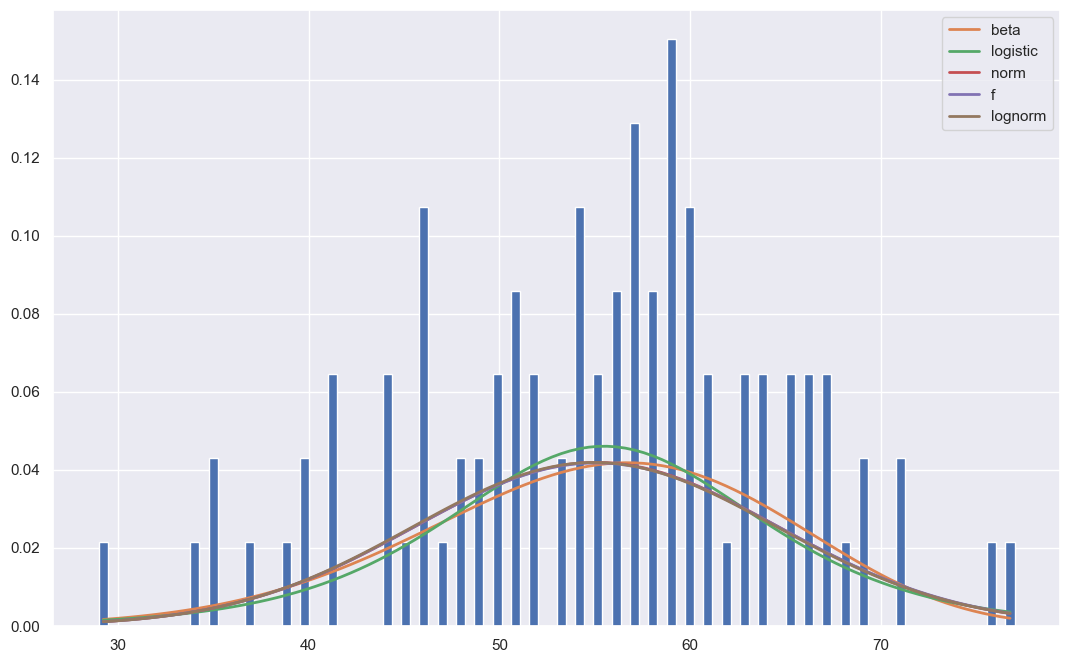

In [51]:
X, y = data.loc[:, data.columns != 'age'], data.age
SR_y = pd.Series(y, name='y')

fitt = Fitter(SR_y, distributions = distributions_set)
fitt.fit()
fitt.summary()

In [52]:
fitt.get_best()

{'beta': {'a': 39.31457839083559,
  'b': 12.961236114051442,
  'loc': -65.92182027161283,
  'scale': 160.8964026104195}}

In [53]:
a, b = fitt.fitted_param.get('beta')[0], fitt.fitted_param.get('beta')[1] 
scale = fitt.fitted_param.get('beta')[3]
loc = fitt.fitted_param.get('beta')[2]

var_beta = beta.stats(a, b,loc,scale)[1]
std_beta = math.sqrt(var_beta)

In [54]:
noise = np.random.normal(0, 1/3, len(data))*std_beta
noise2 = np.random.normal(0, 1/3, len(data))*std_beta

In [55]:
Age_with_noise = data.age + noise
Age_with_noise2 = data.age + noise2

Age_with_noise = pd.DataFrame({'age':Age_with_noise})
Age_with_noise2 = pd.DataFrame({'age':Age_with_noise2})

Age_with_noise = (np.rint(Age_with_noise)).astype('int64')
Age_with_noise2 = (np.rint(Age_with_noise2)).astype('int64')

Age_new = (pd.concat([Age_with_noise, Age_with_noise2])).reset_index()
Age_new = Age_new.drop(columns = ["index"])

### resting_blood_pressure

Fitting 16 distributions: 100%|██████████| 16/16 [00:01<00:00, 15.01it/s]


sumsquare_error          aic         bic  kl_div  ks_statistic  \
laplace          0.049332  1083.630354 -726.488157     inf      0.139175   
cauchy           0.049983  1084.217061 -725.216441     inf      0.095310   
logistic         0.050053  1078.063893 -725.080810     inf      0.096260   
f                0.050146  1056.255878 -715.751763     inf      0.110445   
lognorm          0.050223  1040.138872 -720.177765     inf      0.100480   

          ks_pvalue  
laplace    0.042194  
cauchy     0.320987  
logistic   0.309770  
f          0.173997  
lognorm    0.263230

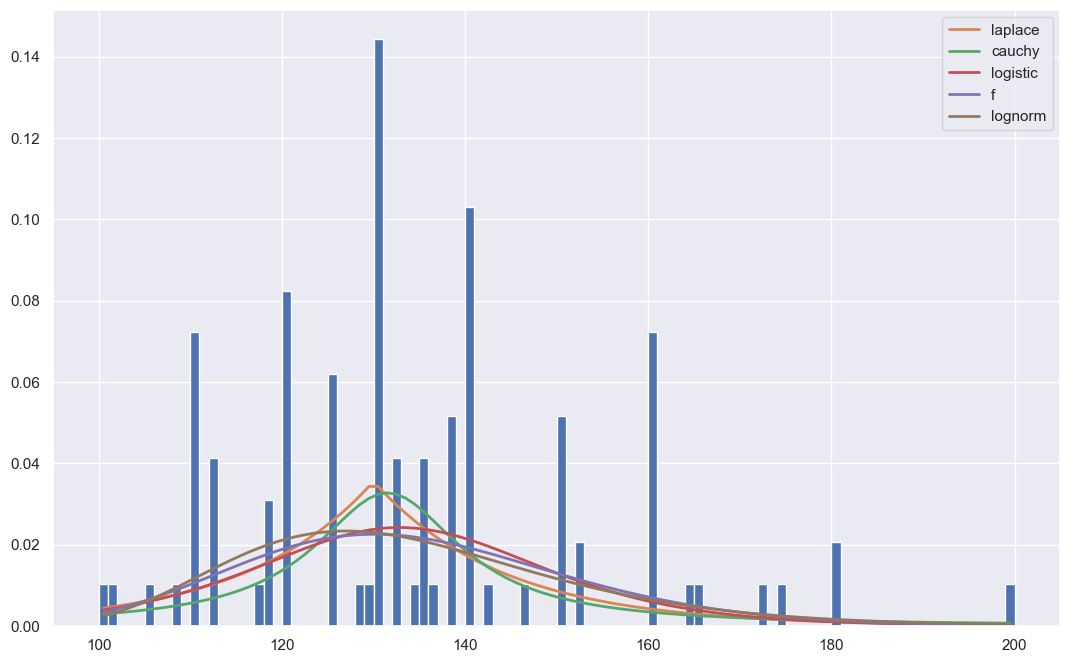

In [56]:
X, y = data.loc[:, data.columns != 'resting_blood_pressure'], data.resting_blood_pressure
SR_y = pd.Series(y, name='y')

fitt = Fitter(SR_y, distributions = distributions_set)
fitt.fit()
fitt.summary()

In [57]:
fitt.get_best()

{'laplace': {'loc': 130.0, 'scale': 14.072164948453608}}

In [58]:
scale = fitt.fitted_param.get('laplace')[1]
loc = fitt.fitted_param.get('laplace')[0]

var_laplace = laplace.stats(loc,scale)[1]
std_laplace = math.sqrt(var_laplace)

In [59]:
noise = np.random.normal(0, 1/3, len(data))*std_laplace
noise2 = np.random.normal(0, 1/3, len(data))*std_laplace

In [60]:
RestBPS_with_noise = data.resting_blood_pressure + noise
RestBPS_with_noise2 = data.resting_blood_pressure + noise2

RestBPS_with_noise = pd.DataFrame({'resting_blood_pressure':RestBPS_with_noise})
RestBPS_with_noise2 = pd.DataFrame({'resting_blood_pressure':RestBPS_with_noise2})

RestBPS_with_noise = (np.rint(RestBPS_with_noise)).astype('int64')
RestBPS_with_noise2 = (np.rint(RestBPS_with_noise2)).astype('int64')

RestBPS_new = (pd.concat([RestBPS_with_noise, RestBPS_with_noise2])).reset_index()
RestBPS_new = RestBPS_new.drop(columns = ["index"])

### cholesterol_level

Fitting 16 distributions: 100%|██████████| 16/16 [00:01<00:00, 10.21it/s]


sumsquare_error          aic          bic  kl_div  ks_statistic  \
beta            0.001419  1207.164779 -1061.571778     inf      0.052983   
gamma           0.001422  1206.935917 -1065.948500     inf      0.058479   
lognorm         0.001424  1207.399031 -1065.790268     inf      0.059897   
f               0.001425  1209.060627 -1061.160957     inf      0.059199   
norm            0.001467  1208.878248 -1067.463977     inf      0.065365   

         ks_pvalue  
beta      0.934793  
gamma     0.874961  
lognorm   0.856531  
f         0.865742  
norm      0.776743

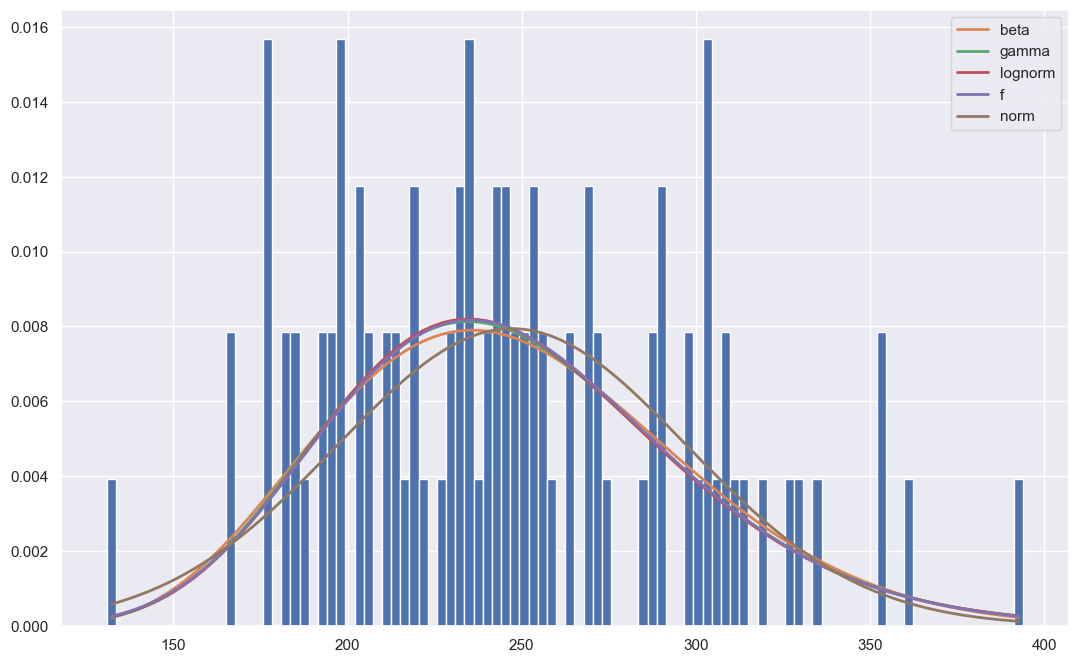

In [61]:
X, y = data.loc[:, data.columns != 'cholesterol_level'], data.cholesterol_level
SR_y = pd.Series(y, name='y')

fitt = Fitter(SR_y, distributions = distributions_set)
fitt.fit()
fitt.summary()

In [62]:
fitt.get_best()

{'beta': {'a': 6.982167962287326,
  'b': 19.469735549171716,
  'loc': 90.03449620804574,
  'scale': 595.4490527851068}}

In [63]:
a, b = fitt.fitted_param.get('beta')[0], fitt.fitted_param.get('beta')[1] 
scale = fitt.fitted_param.get('beta')[3]
loc = fitt.fitted_param.get('beta')[2]

var_beta = beta.stats(a, b,loc,scale)[1]
std_beta = math.sqrt(var_beta)

In [64]:
noise = np.random.normal(0, 1/3, len(data))*std_beta
noise2 = np.random.normal(0, 1/3, len(data))*std_beta

Chol_with_noise = data.cholesterol_level + noise
Chol_with_noise2 = data.cholesterol_level + noise2

Chol_with_noise = pd.DataFrame({'cholesterol_level':Chol_with_noise})
Chol_with_noise2 = pd.DataFrame({'cholesterol_level':Chol_with_noise2})

Chol_with_noise = (np.rint(Chol_with_noise)).astype('int64')
Chol_with_noise2 = (np.rint(Chol_with_noise2)).astype('int64')

Chol_new = (pd.concat([Chol_with_noise, Chol_with_noise2])).reset_index()
Chol_new = Chol_new.drop(columns = ["index"])

### max_heartbeat

Fitting 16 distributions: 100%|██████████| 16/16 [00:02<00:00,  7.90it/s]


sumsquare_error          aic         bic  kl_div  ks_statistic  \
beta             0.008855  1085.680789 -883.948329     inf      0.072051   
norm             0.009115  1096.778817 -890.285973     inf      0.086486   
f                0.009121  1102.434249 -881.074957     inf      0.086609   
gamma            0.009191  1098.508614 -884.912157     inf      0.097405   
logistic         0.009257  1091.415999 -888.784217     inf      0.085371   

          ks_pvalue  
beta       0.668063  
norm       0.438079  
f          0.436288  
gamma      0.296604  
logistic   0.454432

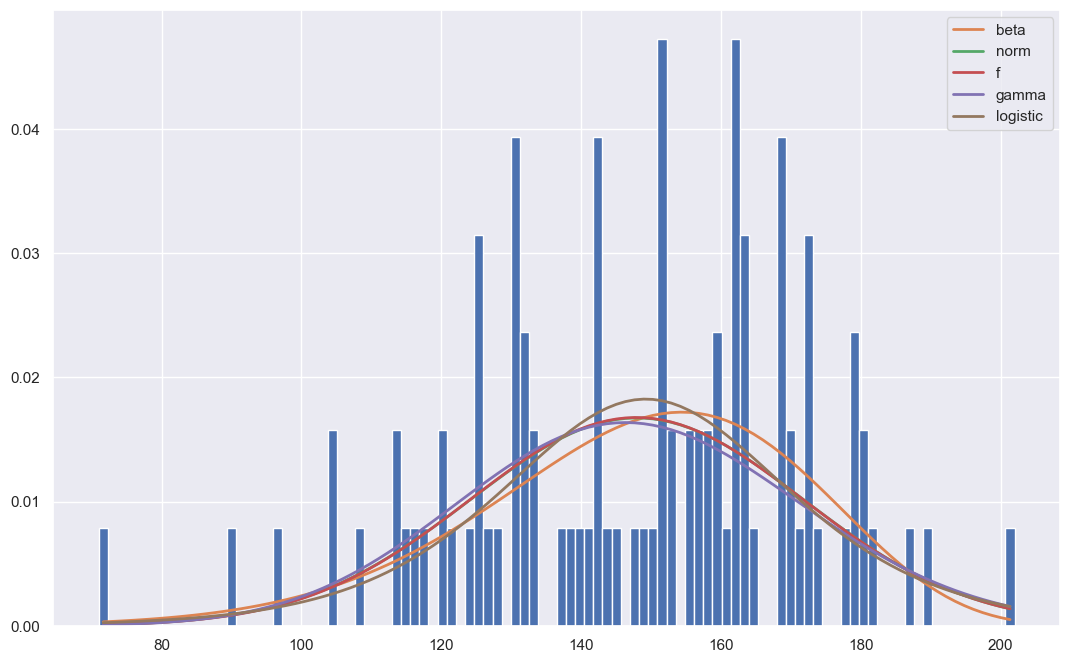

In [65]:
X, y = data.loc[:, data.columns != 'max_heartbeat'], data.max_heartbeat
SR_y = pd.Series(y, name='y')

fitt = Fitter(SR_y, distributions = distributions_set)
fitt.fit()
fitt.summary()

In [66]:
fitt.get_best()

{'beta': {'a': 206.5424164683177,
  'b': 11.9236411188527,
  'loc': -1321.7446965690124,
  'scale': 1554.570584322949}}

In [67]:
a, b = fitt.fitted_param.get('beta')[0], fitt.fitted_param.get('beta')[1] 
scale = fitt.fitted_param.get('beta')[3]
loc = fitt.fitted_param.get('beta')[2]

var_beta = beta.stats(a, b,loc,scale)[1]
std_beta = math.sqrt(var_beta)

In [68]:
noise = np.random.normal(0, 1/3, len(data))*std_beta
noise2 = np.random.normal(0, 1/3, len(data))*std_beta

HeartBeat_with_noise = data.max_heartbeat + noise
HeartBeat_with_noise2 = data.max_heartbeat + noise2

HeartBeat_with_noise = pd.DataFrame({'max_heartbeat':HeartBeat_with_noise})
HeartBeat_with_noise2 = pd.DataFrame({'max_heartbeat':HeartBeat_with_noise2})

HeartBeat_with_noise = (np.rint(HeartBeat_with_noise)).astype('int64')
HeartBeat_with_noise2 = (np.rint(HeartBeat_with_noise2)).astype('int64')

HeartBeat_new = (pd.concat([HeartBeat_with_noise, HeartBeat_with_noise2])).reset_index()
HeartBeat_new = HeartBeat_new.drop(columns = ["index"])

### st_depression

Fitting 16 distributions: 100%|██████████| 16/16 [00:01<00:00,  9.81it/s]


sumsquare_error          aic        bic  kl_div  ks_statistic  \
gamma              31.293488  1015.016490 -96.012059     inf      0.543851   
beta               46.426025   440.590529 -53.175684     inf      0.329897   
weibull_min        48.827563   447.130276 -52.858220     inf      0.329897   
exponpow           53.091557   386.380833 -44.737094     inf      0.329897   
lognorm            60.428769  1140.483723 -32.180698     inf      0.633390   

                ks_pvalue  
gamma        2.045818e-27  
beta         6.600990e-10  
weibull_min  6.600990e-10  
exponpow     6.600990e-10  
lognorm      2.913933e-38

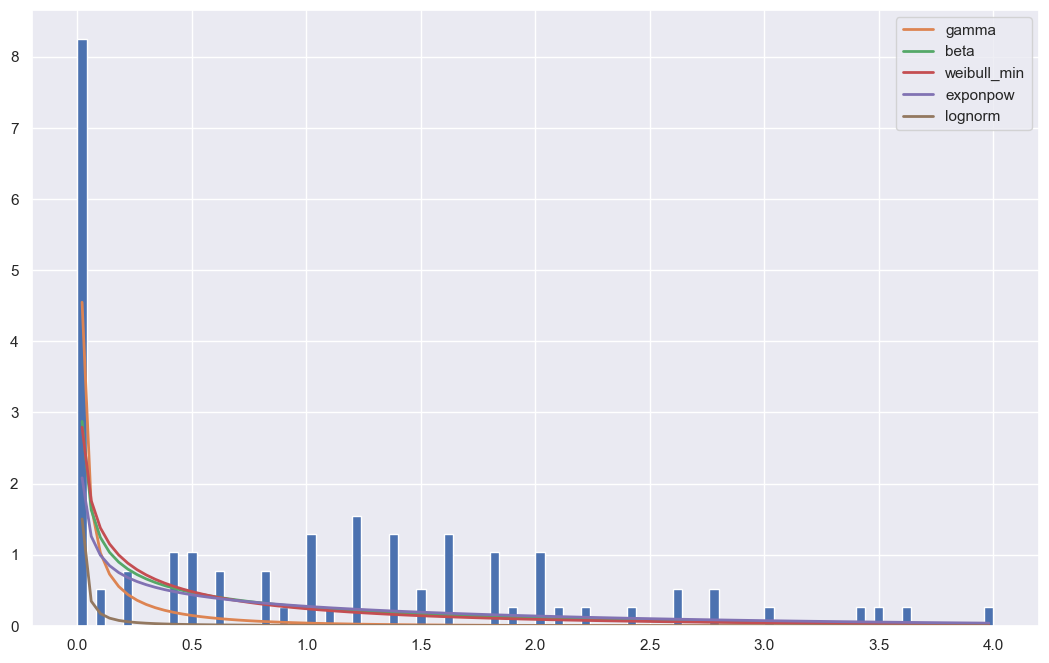

In [69]:
X, y = data.loc[:, data.columns != 'st_depression'], data.st_depression
SR_y = pd.Series(y, name='y')

fitt = Fitter(SR_y, distributions = distributions_set)
fitt.fit()
fitt.summary()

In [70]:
fitt.get_best()

{'gamma': {'a': 0.14714284071496714,
  'loc': -6.855716976395642e-31,
  'scale': 0.6848580511267179}}

In [71]:
a = fitt.fitted_param.get('gamma')[0]
loc = fitt.fitted_param.get('gamma')[1]
scale = fitt.fitted_param.get('gamma')[2]

var_gamma = gamma.stats(a,loc,scale)[1]
std_gamma = math.sqrt(var_gamma)

In [72]:
noise = np.random.normal(0, 1, len(data))*std_gamma
noise2 = np.random.normal(0, 1, len(data))*std_gamma

OldPeak_with_noise = data.st_depression + noise
OldPeak_with_noise2 = data.st_depression + noise2

OldPeak_with_noise = pd.DataFrame({'st_depression':OldPeak_with_noise})
OldPeak_with_noise2 = pd.DataFrame({'st_depression':OldPeak_with_noise2})

OldPeak_with_noise = OldPeak_with_noise.astype('float64')
OldPeak_with_noise2 = OldPeak_with_noise2.astype('float64')

OldPeak_with_noise[OldPeak_with_noise<0] = 0
OldPeak_with_noise2[OldPeak_with_noise2<0] = 0

OldPeak_new = (pd.concat([OldPeak_with_noise, OldPeak_with_noise2])).reset_index()
OldPeak_new = OldPeak_new.drop(columns = ["index"])

### num_major_vessels

Fitting 16 distributions: 100%|██████████| 16/16 [00:01<00:00,  9.56it/s]


sumsquare_error         aic         bic  kl_div  ks_statistic  \
gamma             232.576517  793.174032   98.551438     inf      0.567010   
powerlaw          291.565497  389.459738  120.477841     inf      0.567006   
weibull_min       302.784244  464.224345  124.140155     inf      0.567010   
beta              343.692578  296.724264  141.007395     inf      0.567010   
lognorm           347.005791  703.410244  137.363290     inf      0.567002   

                ks_pvalue  
gamma        5.498254e-30  
powerlaw     5.503890e-30  
weibull_min  5.498246e-30  
beta         5.498245e-30  
lognorm      5.510060e-30

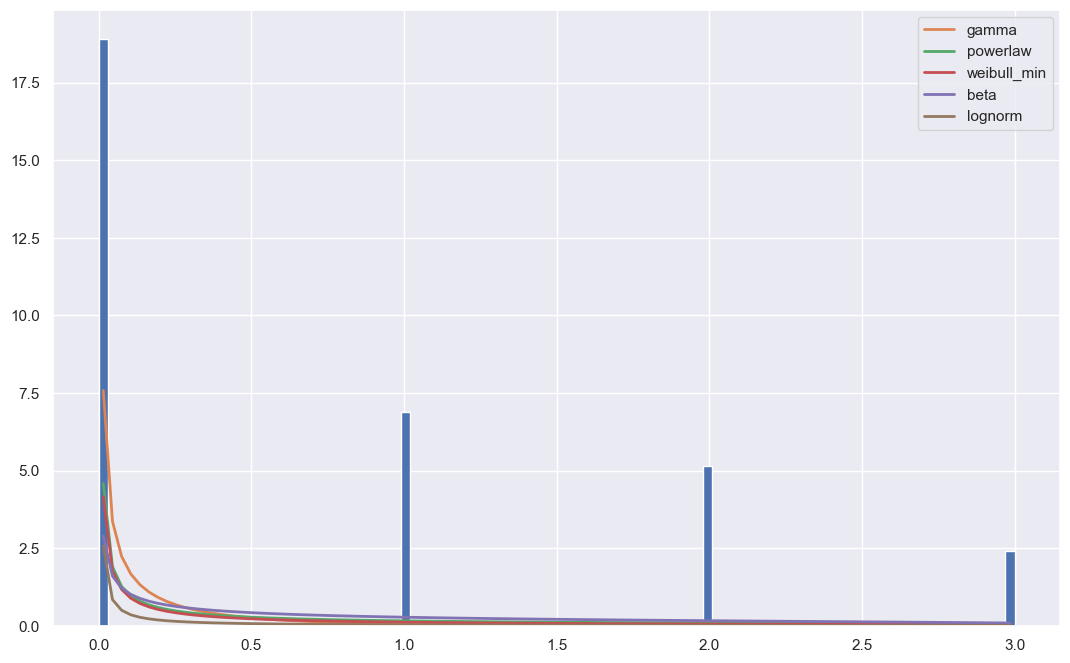

In [73]:
X, y = data.loc[:, data.columns != 'num_major_vessels'], data.num_major_vessels
SR_y = pd.Series(y, name='y')

fitt = Fitter(SR_y, distributions = distributions_set)
fitt.fit()
fitt.summary()

In [74]:
fitt.get_best()

{'gamma': {'a': 0.31689863088760506,
  'loc': -4.6715816476133754e-27,
  'scale': 0.49131103508979496}}

In [75]:
a = fitt.fitted_param.get('gamma')[0]
loc = fitt.fitted_param.get('gamma')[1]
scale = fitt.fitted_param.get('gamma')[2]

var_gamma = gamma.stats(a,loc,scale)[1]
std_gamma = math.sqrt(var_gamma)

In [76]:
noise = np.random.normal(0, 2, len(data))*std_gamma
noise2 = np.random.normal(0, 2, len(data))*std_gamma

In [77]:
CA_with_noise = data.num_major_vessels + noise
CA_with_noise2 = data.num_major_vessels + noise2

CA_with_noise = pd.DataFrame({'num_major_vessels':CA_with_noise})
CA_with_noise2 = pd.DataFrame({'num_major_vessels':CA_with_noise2})

CA_with_noise = (np.rint(CA_with_noise)).astype('int64')
CA_with_noise2 = (np.rint(CA_with_noise2)).astype('int64')

CA_with_noise[CA_with_noise<0] = 0
CA_with_noise[CA_with_noise>3] = 3

CA_with_noise2[CA_with_noise2<0] = 0
CA_with_noise2[CA_with_noise2>3] = 3

CA_new = (pd.concat([CA_with_noise, CA_with_noise2])).reset_index()
CA_new = CA_new.drop(columns = ["index"])

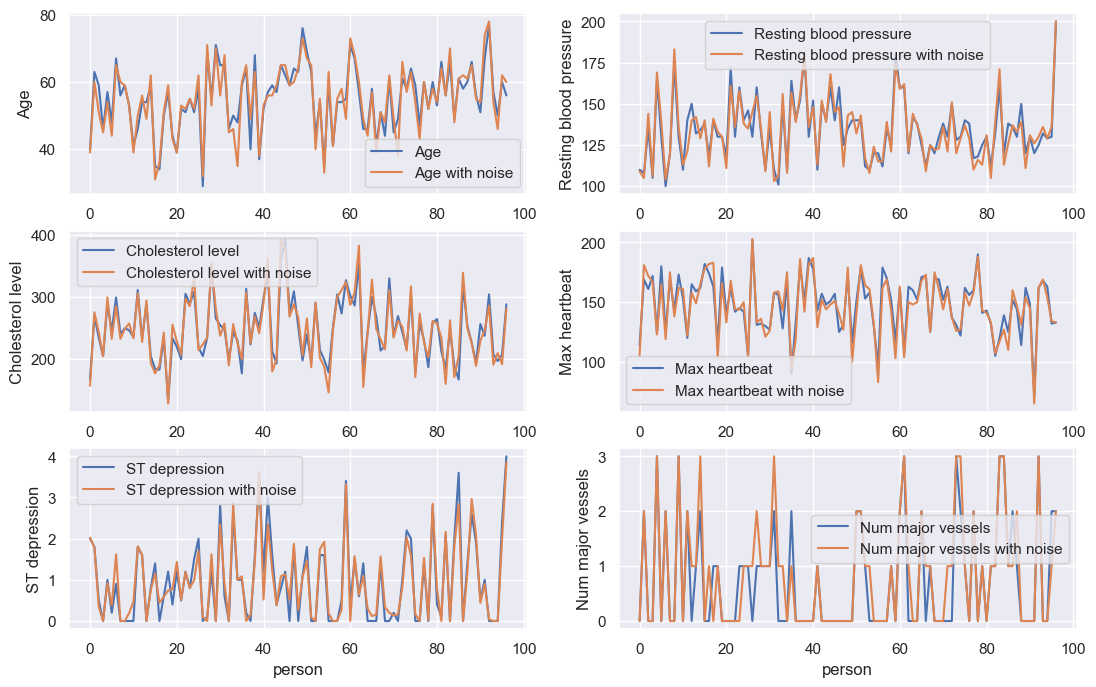

In [78]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,2)

labels = ["Age", "Resting blood pressure", "Cholesterol level", "Max heartbeat", "ST depression", "Num major vessels"]
labels2 = ["Age with noise", "Resting blood pressure with noise", "Cholesterol level with noise", 
           "Max heartbeat with noise", "ST depression with noise", "Num major vessels with noise"]

values = [data.age, data.resting_blood_pressure, data.cholesterol_level, data.max_heartbeat, 
          data.st_depression, data.num_major_vessels]
values2 = [Age_with_noise, RestBPS_with_noise, Chol_with_noise, HeartBeat_with_noise, OldPeak_with_noise, CA_with_noise]

for i, ax in enumerate(ax.flatten()):
    ax.plot(values[i], label=labels[i])
    ax.plot(values2[i], label=labels2[i])
    ax.legend()
    ax.set_ylabel(labels[i])
    ax.set_xlabel("person")
    
plt.show()

In [79]:
condition_with_noise = data.condition
condition_with_noise2 = data.condition
condition_new = pd.concat([condition_with_noise, condition_with_noise2]).reset_index().drop(columns="index")

In [80]:
data_new = pd.concat([Age_new, RestBPS_new, Chol_new, HeartBeat_new, OldPeak_new, CA_new, condition_new], axis=1)
data_new

age  resting_blood_pressure  cholesterol_level  max_heartbeat  \
0     39                     109                156            105   
1     60                     105                275            181   
2     51                     144                243            172   
3     45                     106                204            167   
4     54                     169                299            123   
..   ...                     ...                ...            ...   
189   76                     130                297            164   
190   64                     143                196            191   
191   52                     128                190            159   
192   62                     134                210            134   
193   53                     202                315            129   

     st_depression  num_major_vessels  condition  
0         2.022633                  0          1  
1         1.790535                  2          1  
2         0.347964                  0          0  
3         0.000000                  0          0  
4         0.918653                  3          1  
..             ...                ...        ...  
189       0.067534                  3          1  
190       0.000000                  1          0  
191       0.313067                  1          0  
192       2.278610                  2          1  
193       4.197878                  2          1  

[194 rows x 7 columns]

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

In [82]:
data_copy = data.copy()

In [83]:
knn = KNeighborsClassifier(n_neighbors=5)
X_pom = data_copy.loc[:, ['age', 'resting_blood_pressure', 'cholesterol_level', 'max_heartbeat', 'st_depression', 'num_major_vessels']]
y_pom = data_copy.loc[:,['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'thal_test']]
#X_pom_train, X_pom_test, y_pom_train, y_pom_test = train_test_split(X_pom, y_pom, test_size = 0.2, random_state=42)
knn.fit(X_pom, y_pom)



KNeighborsClassifier()

In [84]:
data_predict = knn.predict(data_new.loc[:, ['age', 'resting_blood_pressure', 'cholesterol_level', 'max_heartbeat', 'st_depression', 'num_major_vessels']])
data_predict

array([[1, 3, 0, ..., 1, 1, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [1, 2, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 3, 0, ..., 1, 1, 0],
       [1, 3, 1, ..., 1, 1, 2]], dtype=int64)

In [85]:
data_predict = data_predict.transpose()

In [86]:
Sex_new = pd.DataFrame({'sex':data_predict[0]})
CP_new = pd.DataFrame({'chest_pain_type':data_predict[1]})
FBS_new = pd.DataFrame({'fasting_blood_sugar':data_predict[2]})
RestECG_new = pd.DataFrame({'rest_ecg':data_predict[3]})
Exang_new = pd.DataFrame({'exercise_induced_angina':data_predict[4]})
Slope_new = pd.DataFrame({'st_slope':data_predict[5]})
Thal_new = pd.DataFrame({'thal_test':data_predict[6]})

In [87]:
data_knn = pd.concat([Sex_new, CP_new, FBS_new, RestECG_new, Exang_new, Slope_new, Thal_new], axis=1)

In [88]:
data_pom = pd.concat([data_knn, data_new], axis=1)
data_pom

sex  chest_pain_type  fasting_blood_sugar  rest_ecg  \
0      1                3                    0         2   
1      0                3                    0         0   
2      1                2                    0         2   
3      1                1                    0         0   
4      1                3                    0         2   
..   ...              ...                  ...       ...   
189    0                1                    0         2   
190    1                0                    0         0   
191    1                0                    0         0   
192    1                3                    0         2   
193    1                3                    1         2   

     exercise_induced_angina  st_slope  thal_test  age  \
0                          1         1          0   39   
1                          0         0          0   60   
2                          0         0          0   51   
3                          0         0          0   45   
4                          1         1          0   54   
..                       ...       ...        ...  ...   
189                        0         0          0   76   
190                        0         0          0   64   
191                        0         0          0   52   
192                        1         1          0   62   
193                        1         1          2   53   

     resting_blood_pressure  cholesterol_level  max_heartbeat  st_depression  \
0                       109                156            105       2.022633   
1                       105                275            181       1.790535   
2                       144                243            172       0.347964   
3                       106                204            167       0.000000   
4                       169                299            123       0.918653   
..                      ...                ...            ...            ...   
189                     130                297            164       0.067534   
190                     143                196            191       0.000000   
191                     128                190            159       0.313067   
192                     134                210            134       2.278610   
193                     202                315            129       4.197878   

     num_major_vessels  condition  
0                    0          1  
1                    2          1  
2                    0          0  
3                    0          0  
4                    3          1  
..                 ...        ...  
189                  3          1  
190                  1          0  
191                  1          0  
192                  2          1  
193                  2          1  

[194 rows x 14 columns]

In [89]:
data_final = pd.concat([data_copy, data_pom])
data_final = data_final.reset_index()
data_final = data_final.drop(columns = ['index'])
data_final

age  sex  chest_pain_type  resting_blood_pressure  cholesterol_level  \
0     40    1                3                     110                167   
1     63    0                3                     108                269   
2     59    1                3                     135                234   
3     46    0                1                     105                204   
4     57    1                3                     165                289   
..   ...  ...              ...                     ...                ...   
286   76    0                1                     130                297   
287   64    1                0                     143                196   
288   52    1                0                     128                190   
289   62    1                3                     134                210   
290   53    1                3                     202                315   

     fasting_blood_sugar  rest_ecg  max_heartbeat  exercise_induced_angina  \
0                      0         2            114                        1   
1                      0         0            169                        1   
2                      0         0            161                        0   
3                      0         0            172                        0   
4                      1         2            124                        0   
..                   ...       ...            ...                      ...   
286                    0         2            164                        0   
287                    0         0            191                        0   
288                    0         0            159                        0   
289                    0         2            134                        1   
290                    1         2            129                        1   

     st_depression  st_slope  num_major_vessels  thal_test  condition  
0         2.000000         1                  0          2          1  
1         1.800000         1                  2          0          1  
2         0.500000         1                  0          2          0  
3         0.000000         0                  0          0          0  
4         1.000000         1                  3          2          1  
..             ...       ...                ...        ...        ...  
286       0.067534         0                  3          0          1  
287       0.000000         0                  1          0          0  
288       0.313067         0                  1          0          0  
289       2.278610         1                  2          0          1  
290       4.197878         1                  2          2          1  

[291 rows x 14 columns]

In [90]:
data2

age  sex  chest_pain_type  resting_blood_pressure  cholesterol_level  \
0     40    1                1                     140                289   
1     49    0                2                     160                180   
2     37    1                1                     130                283   
3     48    0                3                     138                214   
4     54    1                2                     150                195   
..   ...  ...              ...                     ...                ...   
616   52    1                2                     138                223   
617   43    1                3                     132                247   
618   52    1                3                     128                204   
619   58    1                1                     125                220   
620   38    1                2                     138                175   

     fasting_blood_sugar  rest_ecg  max_heartbeat  exercise_induced_angina  \
0                      0         0            172                        0   
1                      0         0            156                        0   
2                      0         1             98                        0   
3                      0         0            108                        1   
4                      0         0            122                        0   
..                   ...       ...            ...                      ...   
616                    0         0            169                        0   
617                    1         2            143                        1   
618                    1         0            156                        1   
619                    0         0            144                        0   
620                    0         0            173                        0   

     st_depression  st_slope  condition  
0              0.0         0          0  
1              1.0         1          1  
2              0.0         0          0  
3              1.5         1          1  
4              0.0         0          0  
..             ...       ...        ...  
616            0.0         0          0  
617            0.1         1          1  
618            1.0         1          1  
619            0.4         1          0  
620            0.0         0          0  

[621 rows x 12 columns]

In [91]:
data2 = data2.replace({'cholesterol_level':0}, data2.loc[data2.cholesterol_level!=0].cholesterol_level.median())

In [92]:
df1 = data2.copy()

In [93]:
knn = KNeighborsClassifier(n_neighbors=5)
X_pom = data_copy.loc[:, ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol_level', 'fasting_blood_sugar',
                      'rest_ecg', 'max_heartbeat', 'exercise_induced_angina', 'st_depression', 'st_slope', 'condition']]
y_pom = data_copy.loc[:,['num_major_vessels', 'thal_test']]
knn.fit(X_pom, y_pom)

KNeighborsClassifier()

In [94]:
data2_predict = knn.predict(df1.loc[:, ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol_level', 'fasting_blood_sugar',
                      'rest_ecg', 'max_heartbeat', 'exercise_induced_angina', 'st_depression', 'st_slope', 'condition']])
data2_predict = data2_predict.transpose()

In [95]:
CA2_new = pd.DataFrame({'num_major_vessels':data2_predict[0]})
Thal2_new = pd.DataFrame({'thal_test':data2_predict[1]})
data2_new = pd.concat([CA2_new, Thal2_new], axis=1)
data2_final = pd.concat([df1, data2_new], axis=1)

### Augmentirani dataset

In [96]:
data_uk = pd.concat([data2_final, data_final])
data_uk = data_uk.reset_index().drop(columns="index")
data_uk

age  sex  chest_pain_type  resting_blood_pressure  cholesterol_level  \
0     40    1                1                     140                289   
1     49    0                2                     160                180   
2     37    1                1                     130                283   
3     48    0                3                     138                214   
4     54    1                2                     150                195   
..   ...  ...              ...                     ...                ...   
907   76    0                1                     130                297   
908   64    1                0                     143                196   
909   52    1                0                     128                190   
910   62    1                3                     134                210   
911   53    1                3                     202                315   

     fasting_blood_sugar  rest_ecg  max_heartbeat  exercise_induced_angina  \
0                      0         0            172                        0   
1                      0         0            156                        0   
2                      0         1             98                        0   
3                      0         0            108                        1   
4                      0         0            122                        0   
..                   ...       ...            ...                      ...   
907                    0         2            164                        0   
908                    0         0            191                        0   
909                    0         0            159                        0   
910                    0         2            134                        1   
911                    1         2            129                        1   

     st_depression  st_slope  condition  num_major_vessels  thal_test  
0         0.000000         0          0                  0          0  
1         1.000000         1          1                  0          0  
2         0.000000         0          0                  2          0  
3         1.500000         1          1                  1          2  
4         0.000000         0          0                  0          1  
..             ...       ...        ...                ...        ...  
907       0.067534         0          1                  3          0  
908       0.000000         0          0                  1          0  
909       0.313067         0          0                  1          0  
910       2.278610         1          1                  2          0  
911       4.197878         1          1                  2          2  

[912 rows x 14 columns]

## Implementing machine learning models

Test and train split of the datasets are the starting point of Ml models. For the train set we will use the set of 912 that is displayed above. It contains data from heart.scv and heart_cleveland.csv and augmented data.

In [97]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import sys
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, make_scorer, accuracy_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import classification_report


scoring = {"precision":make_scorer(precision_score) , "accuracy": make_scorer(accuracy_score), 
           "recall":make_scorer(recall_score), "F1 score":make_scorer(f1_score)}

models = []

copy=data_uk.loc[:, data_uk.columns != 'condition']
features=copy.columns
#print(features)
X_train = data_uk[features]
y_train = data_uk['condition']

#Test data is from heart_cleveland, already saved
X_testModel, X_valModel, y_testModel, y_valModel = train_test_split(X_test,y_test, test_size = 0.5, stratify = y_test)

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

scaler=StandardScaler()
X_testModel=scaler.fit_transform(X_testModel)
scaler=StandardScaler()
X_valModel=scaler.fit_transform(X_valModel)


### Decision Tree

In [99]:
#Need to find the best depth
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4,  scoring=scoring, refit="accuracy")
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print ("The best max depth is ",clf.best_params_)
best_depth=clf.best_params_["max_depth"]
print(classification_report(y_valModel, clf.predict(X_valModel)))

The best max depth is  {'max_depth': 5}
              precision    recall  f1-score   support

           0       0.73      0.65      0.69        54
           1       0.63      0.72      0.67        46

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.69      0.68      0.68       100



In [100]:
ind = clf.cv_results_['params'].index(clf.best_params_)
accuracy_DT = clf.cv_results_['mean_test_accuracy'][ind]
precision_DT = clf.cv_results_['mean_test_precision'][ind]
recall_DT = clf.cv_results_['mean_test_recall'][ind]
f1_DT = clf.cv_results_['mean_test_F1 score'][ind]

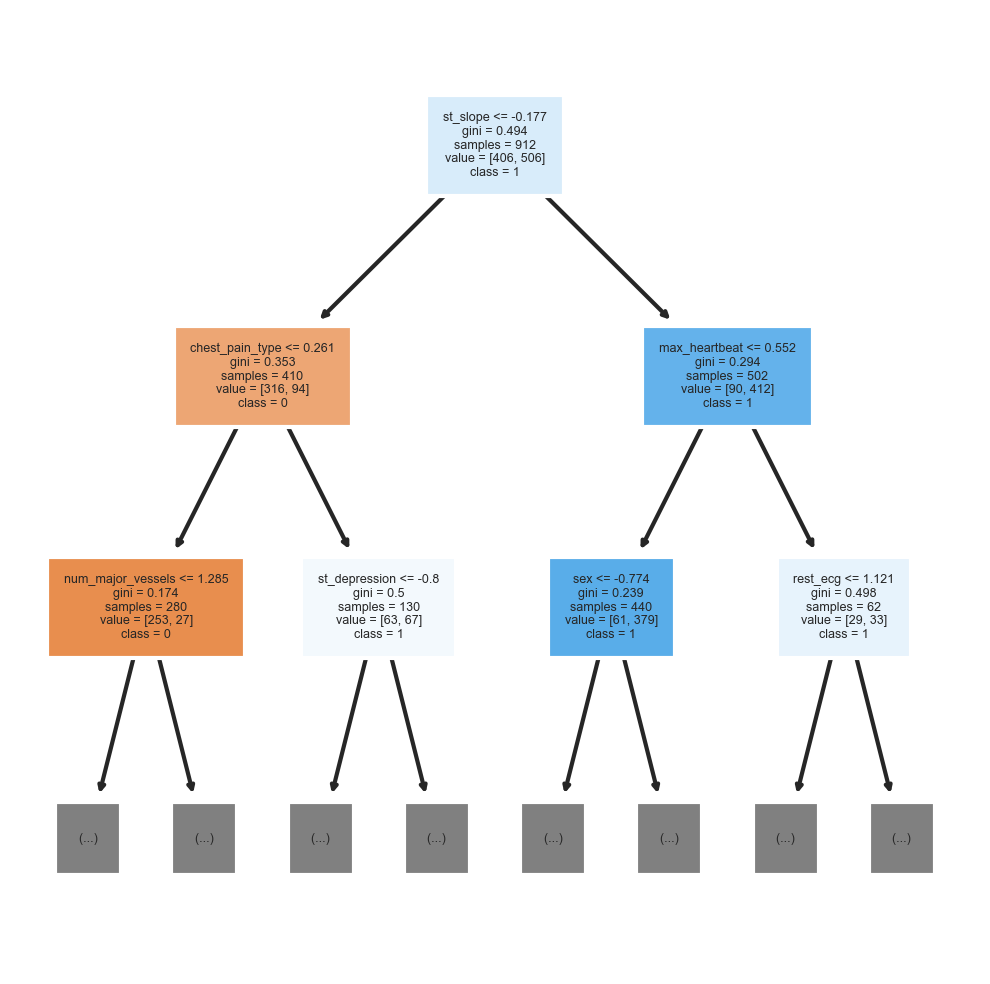

In [101]:
dtree = DecisionTreeClassifier(max_depth=best_depth)
models.append(('DT', dtree))

dtree.fit(X_train, y_train)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dtree, feature_names=features,class_names=["0","1"],filled=True, fontsize = 3,  max_depth = 2)
plt.show()

### Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,scoring=scoring, refit="accuracy")
logreg_cv.fit(X_train,y_train)

print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

C=logreg_cv.best_params_["C"]
reg_type=logreg_cv.best_params_["penalty"]

model_LogRef = LogisticRegression(C=C,penalty=reg_type).fit(X_train, y_train)

models.append(('LR', model_LogRef))

print(classification_report(y_valModel, model_LogRef.predict(X_valModel)))

Tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.83      0.70      0.76        54
           1       0.70      0.83      0.76        46

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.77      0.76      0.76       100



In [103]:
ind = logreg_cv.cv_results_['params'].index(logreg_cv.best_params_)
accuracy_LR = logreg_cv.cv_results_['mean_test_accuracy'][ind]
precision_LR = logreg_cv.cv_results_['mean_test_precision'][ind]
recall_LR = logreg_cv.cv_results_['mean_test_recall'][ind]
f1_LR = logreg_cv.cv_results_['mean_test_F1 score'][ind]

### Support vector machine

In [104]:
# defining parameter range
from sklearn.svm import SVC  
param_grid = {'C': [1, 10, 15], 
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit='accuracy', scoring=scoring , verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print("Best parametars : ",grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END C=1, gamma=0.01, kernel=rbf; F1 score: (test=0.849) accuracy: (test=0.847) precision: (test=0.929) recall: (test=0.782) total time=   0.0s
[CV 2/5] END C=1, gamma=0.01, kernel=rbf; F1 score: (test=0.850) accuracy: (test=0.842) precision: (test=0.901) recall: (test=0.804) total time=   0.0s
[CV 3/5] END C=1, gamma=0.01, kernel=rbf; F1 score: (test=0.863) accuracy: (test=0.830) precision: (test=0.778) recall: (test=0.970) total time=   0.0s
[CV 4/5] END C=1, gamma=0.01, kernel=rbf; F1 score: (test=0.827) accuracy: (test=0.791) precision: (test=0.765) recall: (test=0.901) total time=   0.0s
[CV 5/5] END C=1, gamma=0.01, kernel=rbf; F1 score: (test=0.641) accuracy: (test=0.637) precision: (test=0.711) recall: (test=0.584) total time=   0.0s
[CV 1/5] END C=1, gamma=0.001, kernel=rbf; F1 score: (test=0.856) accuracy: (test=0.852) precision: (test=0.930) recall: (test=0.792) total time=   0.0s
[CV 2/5] END C=1, gamma=0.0

In [105]:
C=grid.best_params_["C"]
gamma=grid.best_params_["gamma"]
kernel=grid.best_params_["kernel"]
SVM_model = SVC(kernel=kernel,C=C,gamma=gamma) 

models.append(('SVM', SVM_model))
  
# fitting x samples and y classes 
SVM_model.fit(X_train, y_train) 


print(classification_report(y_valModel, SVM_model.predict(X_valModel)))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        54
           1       0.70      0.80      0.75        46

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.76      0.75      0.75       100



In [106]:
ind = grid.cv_results_['params'].index(grid.best_params_)
accuracy_SVC = grid.cv_results_['mean_test_accuracy'][ind]
precision_SVC = grid.cv_results_['mean_test_precision'][ind]
recall_SVC = grid.cv_results_['mean_test_recall'][ind]
f1_SVC = grid.cv_results_['mean_test_F1 score'][ind]

### Random Forest

In [107]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6],
}


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring=scoring, refit="accuracy")
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 6, 'max_features': 'auto'}


In [108]:
ind = CV_rfc.cv_results_['params'].index(CV_rfc.best_params_)
accuracy_RF = CV_rfc.cv_results_['mean_test_accuracy'][ind]
precision_RF = CV_rfc.cv_results_['mean_test_precision'][ind]
recall_RF = CV_rfc.cv_results_['mean_test_recall'][ind]
f1_RF = CV_rfc.cv_results_['mean_test_F1 score'][ind]

In [109]:
rf=RandomForestClassifier(max_depth =CV_rfc.best_params_["max_depth"] ,
                          max_features = CV_rfc.best_params_["max_features"]).fit(X_train, y_train)

models.append(('RF', rf))

print(classification_report(y_valModel, rf.predict(X_valModel)))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        54
           1       0.73      0.83      0.78        46

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100



### Naive Bayes

In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

model = GaussianNB()

gs_NB = GridSearchCV(estimator=model, param_grid=params_NB, cv=5, verbose=1, scoring=scoring, refit="accuracy")
gs_NB.fit(X_train, y_train)
print(gs_NB.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 0.08111308307896872}


In [111]:
ind = gs_NB.cv_results_['params'].index(gs_NB.best_params_)
accuracy_NB = gs_NB.cv_results_['mean_test_accuracy'][ind]
precision_NB = gs_NB.cv_results_['mean_test_precision'][ind]
recall_NB = gs_NB.cv_results_['mean_test_recall'][ind]
f1_NB = gs_NB.cv_results_['mean_test_F1 score'][ind]

In [112]:
gnb = GaussianNB(var_smoothing=gs_NB.best_params_['var_smoothing']).fit(X_train, y_train)

models.append(('NB', GaussianNB()))

print(classification_report(y_valModel, gnb.predict(X_valModel)))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        54
           1       0.71      0.80      0.76        46

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.77      0.76      0.76       100



### KNN

In [113]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring=scoring, refit="accuracy", return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 7}


In [114]:
ind = grid.cv_results_['params'].index(grid.best_params_)
accuracy_KNN = grid.cv_results_['mean_test_accuracy'][ind]
precision_KNN = grid.cv_results_['mean_test_precision'][ind]
recall_KNN = grid.cv_results_['mean_test_recall'][ind]
f1_KNN = grid.cv_results_['mean_test_F1 score'][ind]

In [115]:
knn = KNeighborsClassifier(n_neighbors=5)

models.append(('kNN', knn))

knn.fit(X_train, y_train)

print(classification_report(y_valModel, knn.predict(X_valModel)))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75        54
           1       0.71      0.70      0.70        46

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.73      0.73      0.73       100



### Linear Discriminant Analysis

In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring=scoring, refit="accuracy", cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('Config: %s' % results.best_params_)
print(classification_report(y_valModel, search.predict(X_valModel)))

Config: {'solver': 'lsqr'}
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        54
           1       0.71      0.80      0.76        46

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.77      0.76      0.76       100



In [117]:
ind = search.cv_results_['params'].index(search.best_params_)
accuracy_LDA = search.cv_results_['mean_test_accuracy'][ind]
precision_LDA = search.cv_results_['mean_test_precision'][ind]
recall_LDA = search.cv_results_['mean_test_recall'][ind]
f1_LDA = search.cv_results_['mean_test_F1 score'][ind]

In [118]:
model=LinearDiscriminantAnalysis(solver='svd').fit(X_train,y_train)
models.append(('LDA',LinearDiscriminantAnalysis(solver='svd')))

## Model comparasion

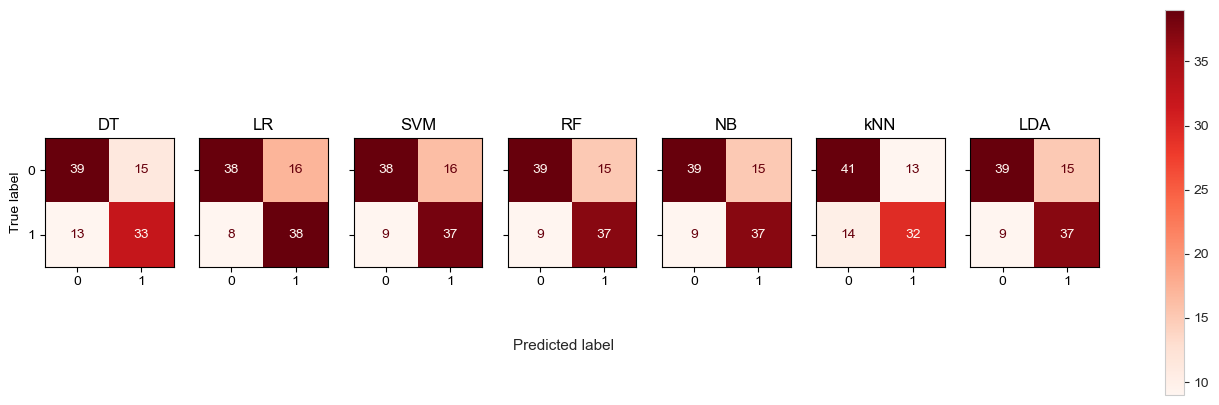

In [119]:
sns.reset_defaults()

f, axes = plt.subplots(1, 7, figsize = (17, 5), sharey = 'row')
i = 0
sns.set_style("whitegrid", {'axes.grid' : False})

for name, model in models:
    
    clf = model
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_valModel)
    
    cf_matrix = confusion_matrix(y_valModel, predictions)
    disp = ConfusionMatrixDisplay(cf_matrix)
    
    disp.plot(ax = axes[i], cmap=plt.cm.Reds)
    disp.ax_.set_title(name)
    
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')
    i+=1

f.text(0.4, 0.2, 'Predicted label').set_fontsize(11) 
f.colorbar(disp.im_, ax = axes)
plt.show()

In [120]:
from tabulate import tabulate

table = [['Decision Tree', accuracy_DT, precision_DT, recall_DT, f1_DT],
        ['Naive Bayes', accuracy_NB, precision_NB, recall_NB, f1_NB],
        ['Random Forest', accuracy_RF, precision_RF, recall_RF, f1_RF],
        ['Logistic Regression', accuracy_LR, precision_LR, recall_LR, f1_LR],
        ['Support Vector Machine', accuracy_SVC, precision_SVC, recall_SVC, f1_SVC],
        ['KNN', accuracy_KNN, precision_KNN, recall_KNN, f1_KNN],
        ['Linear Discriminant Analysis', accuracy_LDA, precision_LDA, recall_LDA, f1_LDA]]

print("Comparison of cross validation metrics from Grid Search:\n")
print (tabulate(table, headers=["Model", "Accuracy", "Precision", "Recall", "F1 score"]))

Comparison of cross validation metrics from Grid Search:

Model                           Accuracy    Precision    Recall    F1 score
----------------------------  ----------  -----------  --------  ----------
Decision Tree                   0.783865     0.80129   0.820248    0.808956
Naive Bayes                     0.808071     0.847337  0.808328    0.821005
Random Forest                   0.818982     0.831098  0.853834    0.83859
Logistic Regression             0.820055     0.83818   0.846235    0.837523
Support Vector Machine          0.809121     0.831238  0.830052    0.826285
KNN                             0.82666      0.852136  0.842196    0.842197
Linear Discriminant Analysis    0.82934      0.845144  0.849699    0.846507


## Feature Importance

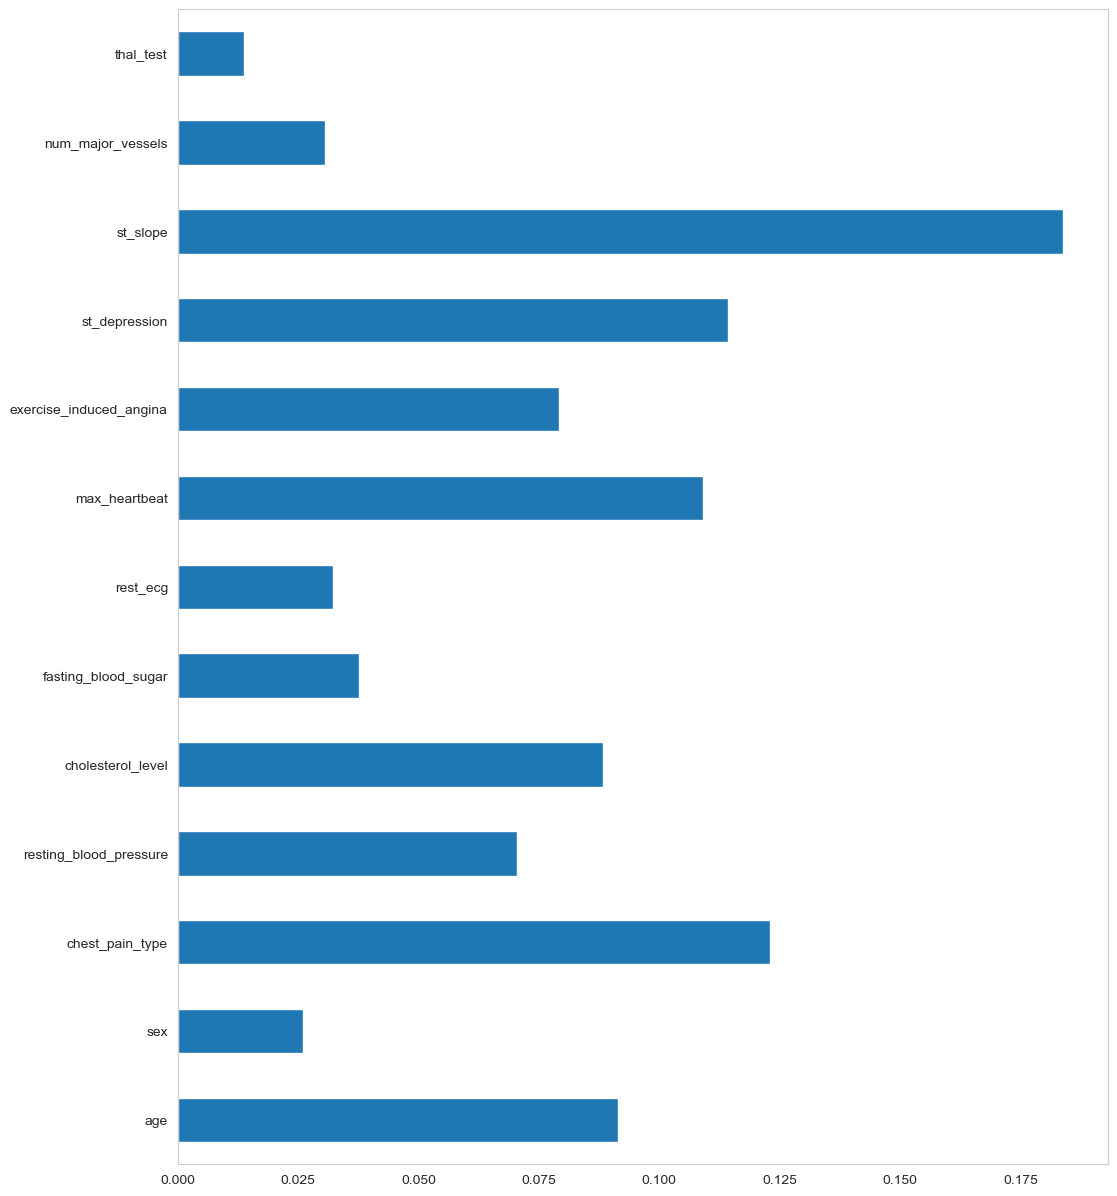

In [121]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
importances = rf.feature_importances_
features = pd.Series(importances, index =data_uk.loc[:, data_uk.columns != 'condition'].columns)
plt.figure(figsize = (12,15))
features.plot(kind = "barh")
plt.show()

## Feature Engineering

In [122]:
from sklearn.preprocessing import PolynomialFeatures

X_train_poly = data_uk[data_uk.columns[data_uk.columns != 'condition']]

# perform a polynomial features transform of the train set
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_poly)

X_train_poly = pd.DataFrame(X_train_poly[:,1:])
X_train_poly.columns = poly.get_feature_names(data_uk[data_uk.columns[data_uk.columns != 'condition']].columns)[1:]
X_train_poly

age  sex  chest_pain_type  resting_blood_pressure  cholesterol_level  \
0    40.0  1.0              1.0                   140.0              289.0   
1    49.0  0.0              2.0                   160.0              180.0   
2    37.0  1.0              1.0                   130.0              283.0   
3    48.0  0.0              3.0                   138.0              214.0   
4    54.0  1.0              2.0                   150.0              195.0   
..    ...  ...              ...                     ...                ...   
907  76.0  0.0              1.0                   130.0              297.0   
908  64.0  1.0              0.0                   143.0              196.0   
909  52.0  1.0              0.0                   128.0              190.0   
910  62.0  1.0              3.0                   134.0              210.0   
911  53.0  1.0              3.0                   202.0              315.0   

     fasting_blood_sugar  rest_ecg  max_heartbeat  exercise_induced_angina  \
0                    0.0       0.0          172.0                      0.0   
1                    0.0       0.0          156.0                      0.0   
2                    0.0       1.0           98.0                      0.0   
3                    0.0       0.0          108.0                      1.0   
4                    0.0       0.0          122.0                      0.0   
..                   ...       ...            ...                      ...   
907                  0.0       2.0          164.0                      0.0   
908                  0.0       0.0          191.0                      0.0   
909                  0.0       0.0          159.0                      0.0   
910                  0.0       2.0          134.0                      1.0   
911                  1.0       2.0          129.0                      1.0   

     st_depression  ...  st_depression^2  st_depression st_slope  \
0         0.000000  ...         0.000000                0.000000   
1         1.000000  ...         1.000000                1.000000   
2         0.000000  ...         0.000000                0.000000   
3         1.500000  ...         2.250000                1.500000   
4         0.000000  ...         0.000000                0.000000   
..             ...  ...              ...                     ...   
907       0.067534  ...         0.004561                0.000000   
908       0.000000  ...         0.000000                0.000000   
909       0.313067  ...         0.098011                0.000000   
910       2.278610  ...         5.192064                2.278610   
911       4.197878  ...        17.622182                4.197878   

     st_depression num_major_vessels  st_depression thal_test  st_slope^2  \
0                           0.000000                 0.000000         0.0   
1                           0.000000                 0.000000         1.0   
2                           0.000000                 0.000000         0.0   
3                           1.500000                 3.000000         1.0   
4                           0.000000                 0.000000         0.0   
..                               ...                      ...         ...   
907                         0.202602                 0.000000         0.0   
908                         0.000000                 0.000000         0.0   
909                         0.313067                 0.000000         0.0   
910                         4.557220                 0.000000         1.0   
911                         8.395757                 8.395757         1.0   

     st_slope num_major_vessels  st_slope thal_test  num_major_vessels^2  \
0                           0.0                 0.0                  0.0   
1                           0.0                 0.0                  0.0   
2                           0.0                 0.0                  4.0   
3                           1.0                 2.0                  1.0   
4         

In [123]:
# data standardization
scaler=StandardScaler();
X_train_poly=scaler.fit_transform(X_train_poly)

In [124]:
model=LinearDiscriminantAnalysis(solver='svd').fit(X_train_poly, y_train)

In [125]:
X_val_poly = X_valModel.copy()

# perform a polynomial features transform of the test set
poly = PolynomialFeatures(degree=2)
X_val_poly = poly.fit_transform(X_val_poly)

X_val_poly = pd.DataFrame(X_val_poly[:,1:])
X_val_poly.columns = poly.get_feature_names(X_test.columns)[1:]

In [126]:
from sklearn.model_selection import RepeatedStratifiedKFold

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    return scores

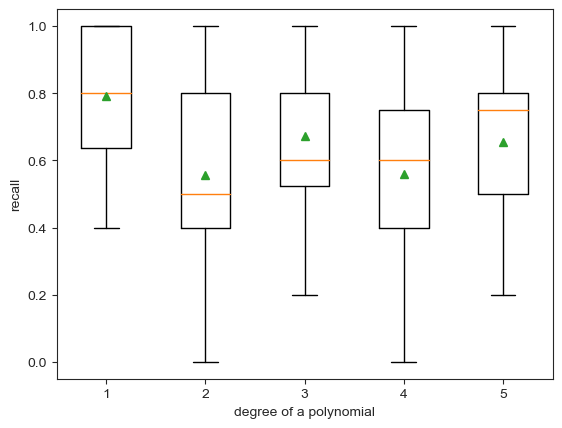

In [127]:
from matplotlib import pyplot

results= []
names = []

for d in range(1, 6):
    
    X_train_poly = data_uk[data_uk.columns[data_uk.columns != 'condition']]
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train_poly)
    X_train_poly = pd.DataFrame(X_train_poly[:,1:])
    X_train_poly.columns = poly.get_feature_names(data_uk[data_uk.columns[data_uk.columns != 'condition']].columns)[1:]
    scaler=StandardScaler();
    X_train_poly=scaler.fit_transform(X_train_poly)
    
    model=LinearDiscriminantAnalysis(solver='svd').fit(X_train_poly,y_train)
    
    X_val_poly = X_valModel.copy()
    poly = PolynomialFeatures(degree=d)
    X_val_poly = poly.fit_transform(X_val_poly)
    X_val_poly = pd.DataFrame(X_val_poly[:,1:])
    X_val_poly.columns = poly.get_feature_names(X_test.columns)[1:]
    

    scores = evaluate_model(model, X_val_poly, y_valModel)
    results.append(scores)
    names.append(d)

sns.set_style('ticks')
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.ylabel('recall')
pyplot.xlabel('degree of a polynomial')
pyplot.show()

## Final results on Test set

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        54
           1       0.74      0.80      0.77        46

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



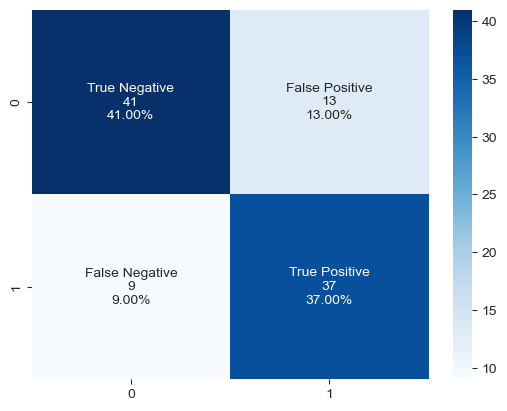

In [128]:
model=LinearDiscriminantAnalysis(solver='svd').fit(X_train,y_train)

print(classification_report(y_testModel, model.predict(X_testModel)))

cm = confusion_matrix(y_testModel, model.predict(X_testModel))

group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

plt.show()